# UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

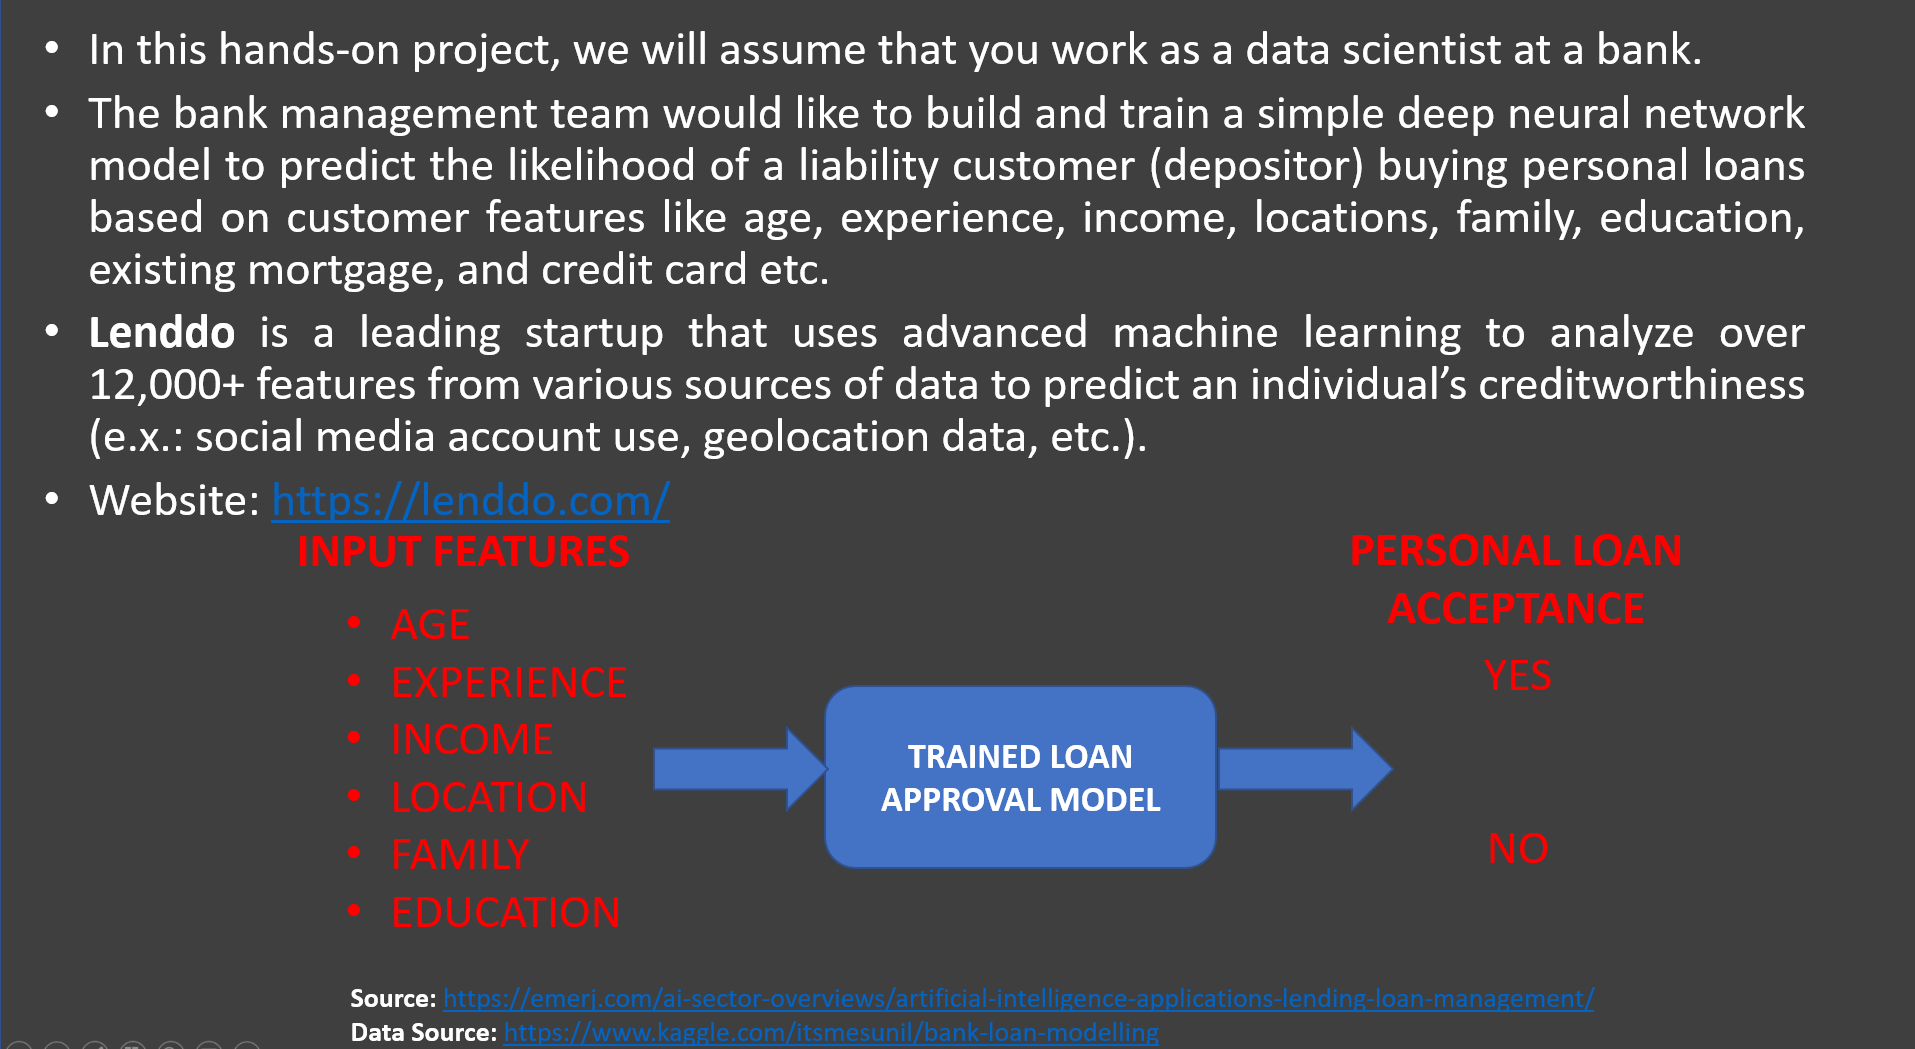

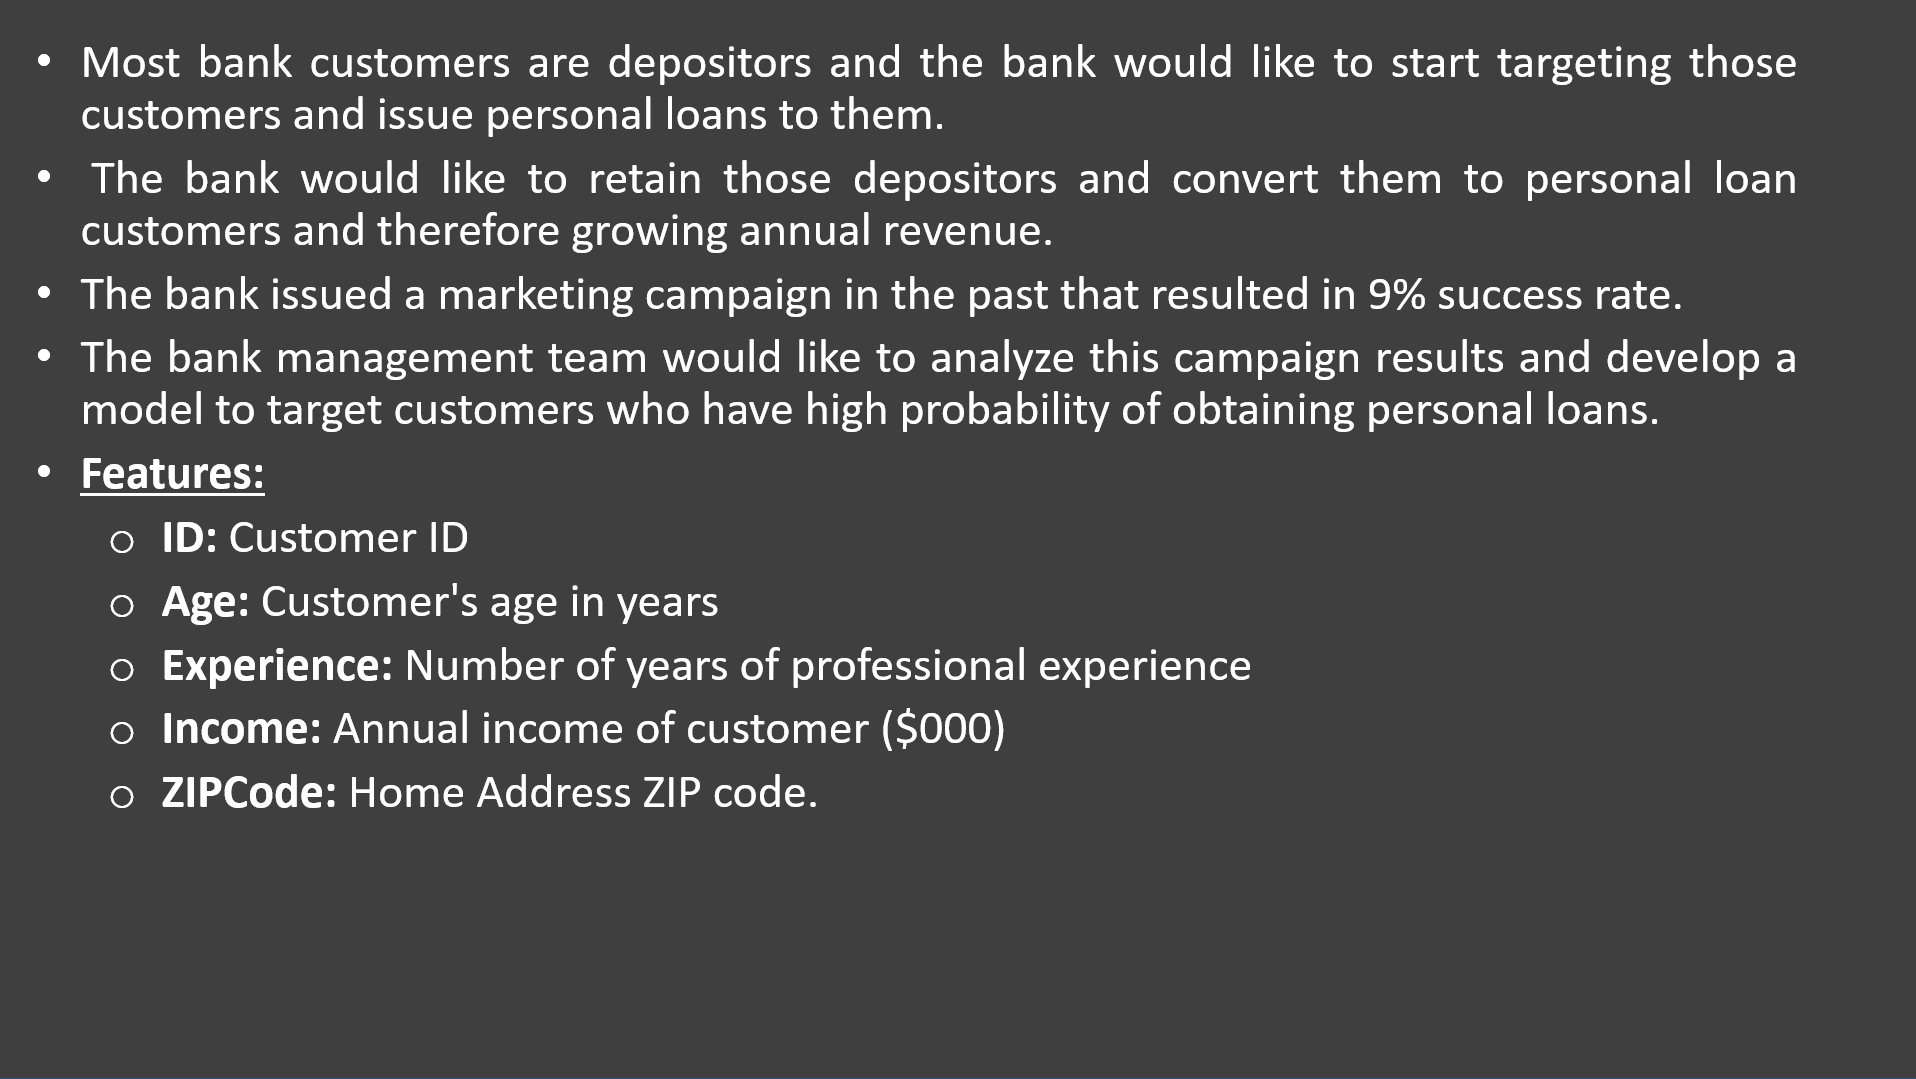

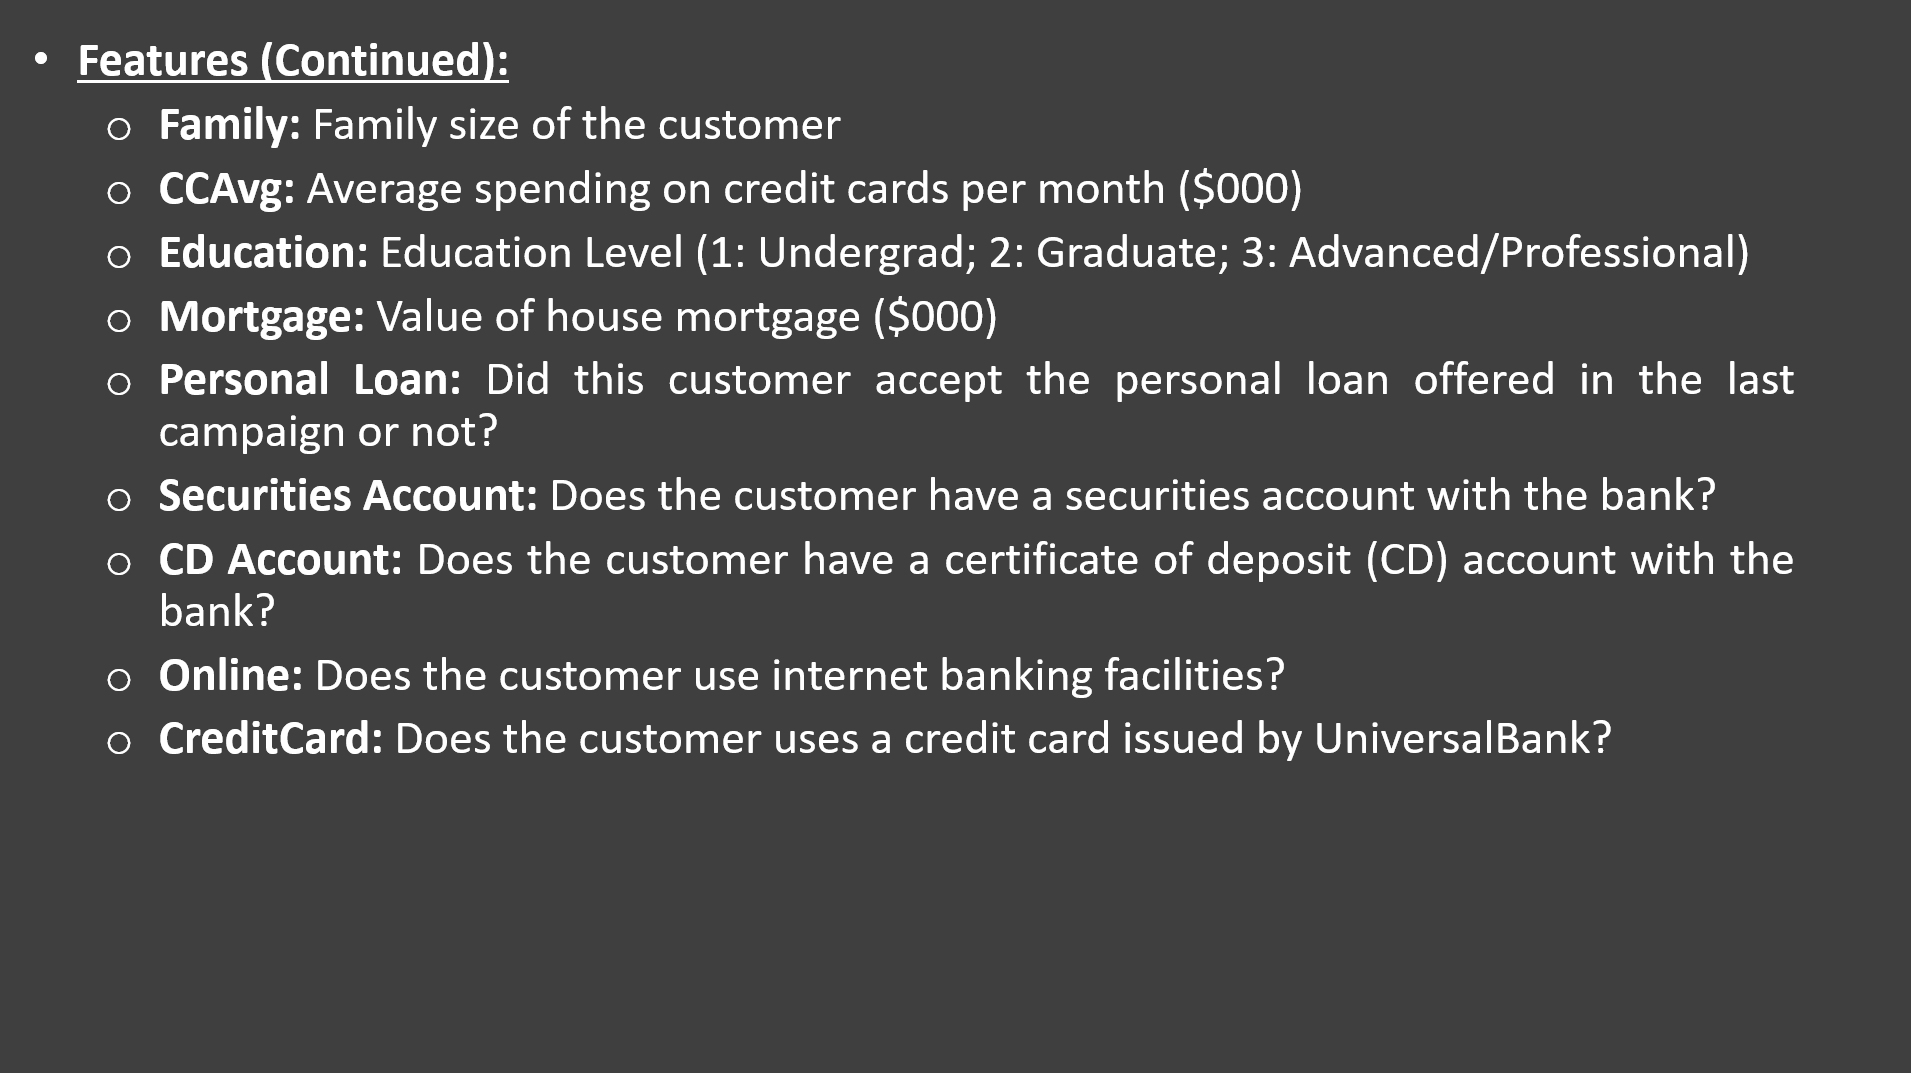

# IMPORT DATASETS AND LIBRARIES

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
import matplotlib.pyplot as plt

# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [114]:
# Load dataset
bank_df = pd.read_csv('UniversalBank.csv')

In [115]:
# Visualize dataset
bank_df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [116]:
bank_df

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

# PERFORM EXPLORATORY DATA ANALYSIS

In [117]:
# Obtain dataframe info
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [118]:
# Obtain the statistical summary of the dataframe
bank_df.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [119]:
# For better visualization
bank_df.describe().T

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

In [120]:
# See how many null values exist in the dataframe
bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

- What is the % of customers who have credit cards?
- What is the % of customers who accepted the personal loan?

In [121]:


creditcard_customers = bank_df[bank_df['CreditCard'] == 1]
creditcard_customers

len(creditcard_customers)

# Total number of customers
len(bank_df)

CC_Customers_percent = len(creditcard_customers)/len(bank_df) * 100
print('Percentage of Customers who have credit cards is = ', CC_Customers_percent,'%')

Percentage of Customers who have credit cards is =  29.4 %


In [122]:
accepted_customers = bank_df[bank_df['Personal Loan'] == 1]
accepted_customers

len(accepted_customers)

# Total number of customers
len(bank_df)

accepted_customers_percent = len(accepted_customers)/len(bank_df) * 100
print('Percentage of Customers who accepted the personal loan offer = ', accepted_customers_percent,'%')

Percentage of Customers who accepted the personal loan offer =  9.6 %


# PERFORM DATA VISUALIZATION

C:\Users\Admin\AppData\Local\Temp\ipykernel_358608\2469143000.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Personal Loan', data=bank_df, palette='viridis')


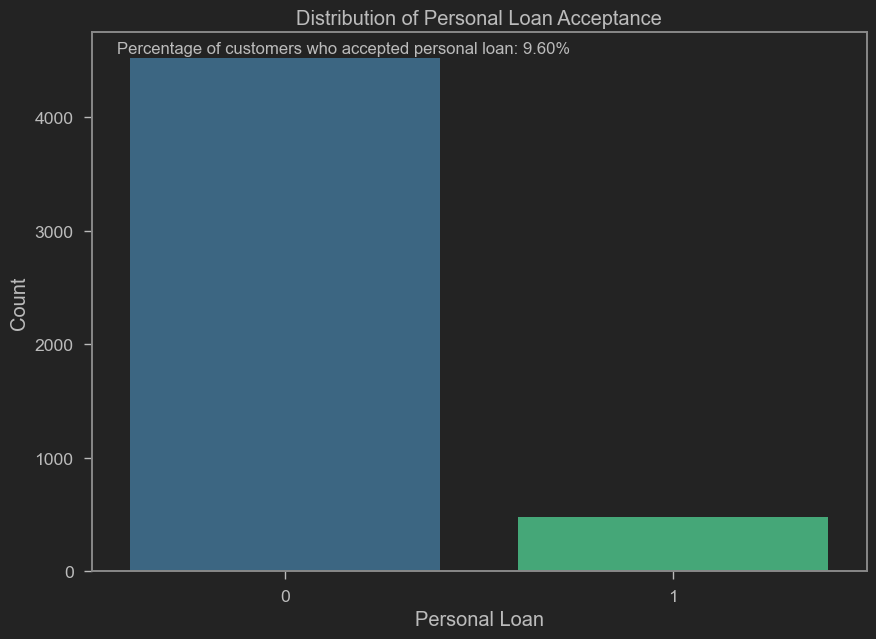

In [123]:

# Assuming you have a DataFrame named bank_df
plt.figure(figsize=(10, 7))

# Plot countplot for 'Personal Loan' column
sns.countplot(x='Personal Loan', data=bank_df, palette='viridis')

# Set the title and labels
plt.title('Distribution of Personal Loan Acceptance')
plt.xlabel('Personal Loan')
plt.ylabel('Count')

# Display the percentage on the plot
plt.figtext(0.15, 0.85, f'Percentage of customers who accepted personal loan: {accepted_customers_percent:.2f}%', fontsize=12)

plt.show()


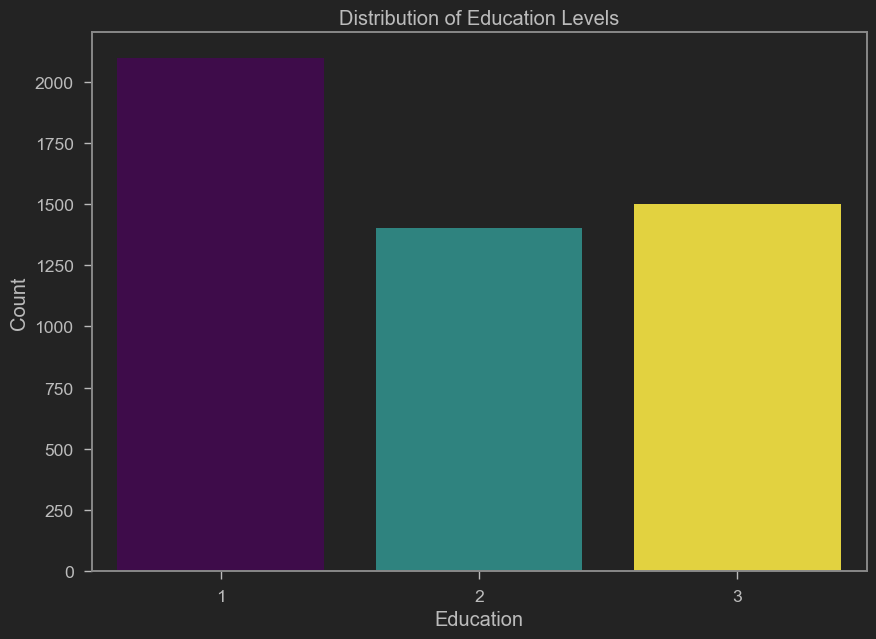

In [124]:

# Assuming you have a DataFrame named bank_df
plt.figure(figsize=(10, 7))

# Plot countplot for 'Education' column
# sns.countplot(x='Education', data=bank_df ,  palette='viridis')
sns.countplot(x='Education', data=bank_df, hue='Education', palette='viridis', legend=False)

# Set the title and labels
plt.title('Distribution of Education Levels')
plt.xlabel('Education')
plt.ylabel('Count')

plt.show()


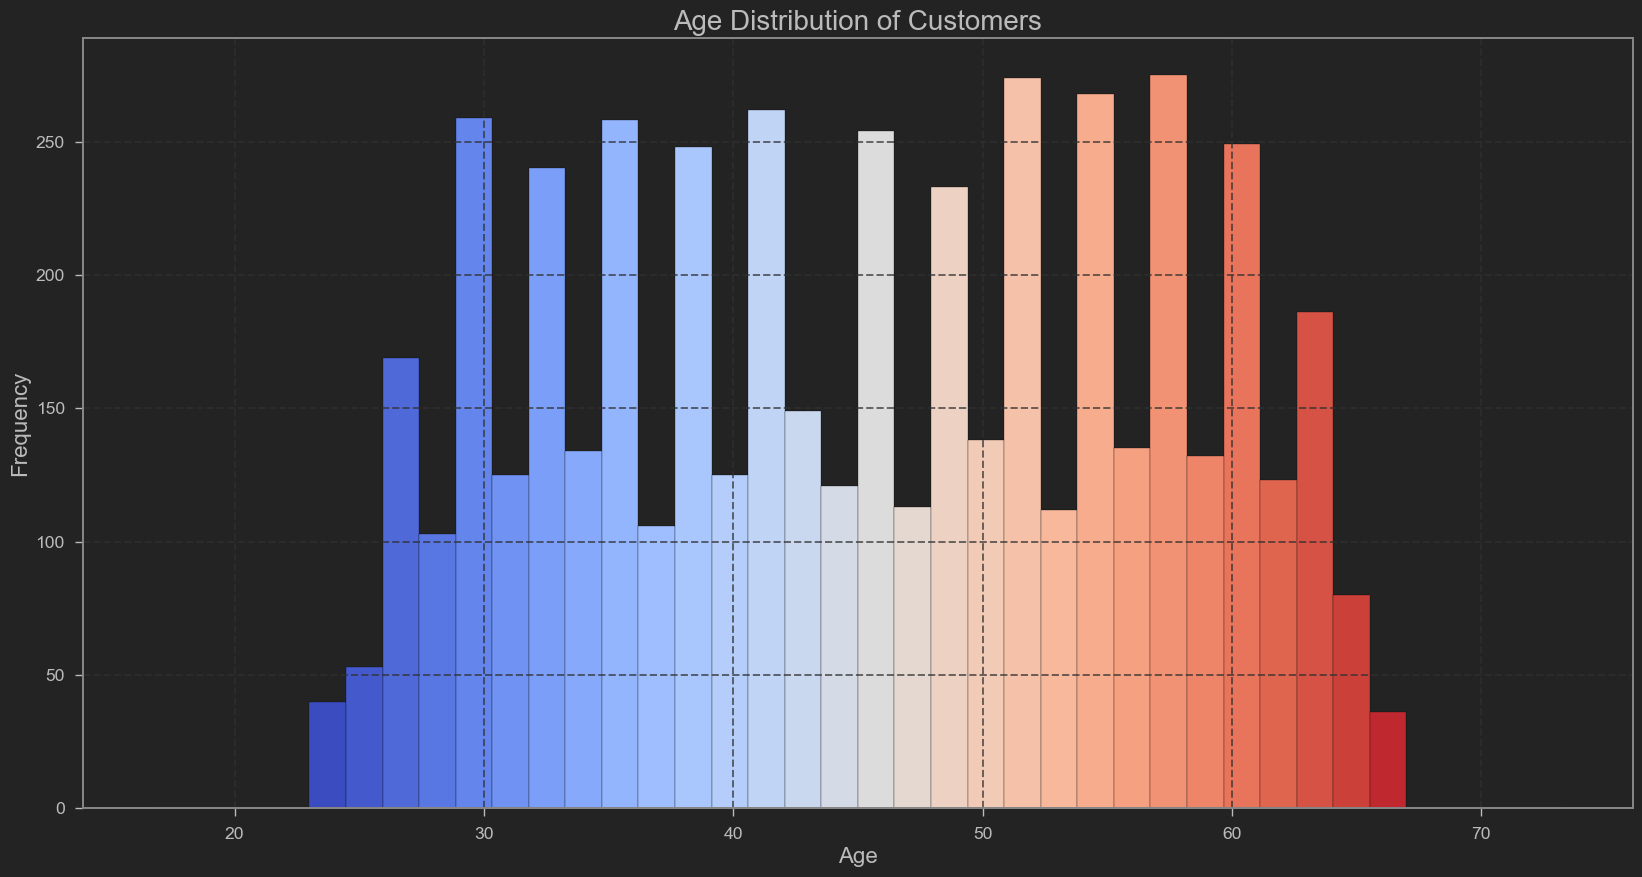

In [125]:
plt.figure(figsize=(20, 10))

# Define a color map for the histogram
cmap = plt.get_cmap('coolwarm')

# Plot histogram for 'Age' column
hist_data = bank_df['Age']
n, bins, patches = plt.hist(hist_data, bins=30, color='teal', edgecolor='black')

# Color each bin with a gradient
for i, patch in enumerate(patches):
    patch.set_facecolor(cmap(i / len(patches)))

# Add KDE for smooth distribution
sns.kdeplot(hist_data, color='black', linewidth=2)

# Set the title and labels
plt.title('Age Distribution of Customers', fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_358608\705537112.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CreditCard', data=bank_df, palette='viridis')


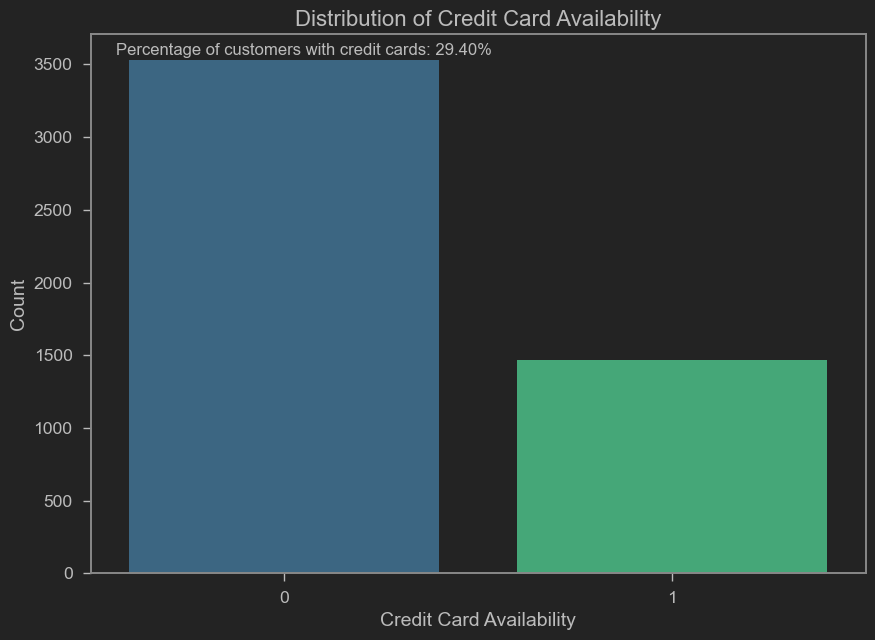

In [126]:
plt.figure(figsize=(10, 7))

# Plot countplot for 'CreditCard' column with a colorful palette
sns.countplot(x='CreditCard', data=bank_df, palette='viridis')

# Set the title and labels
plt.title('Distribution of Credit Card Availability', fontsize=16)
plt.xlabel('Credit Card Availability', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Calculate and display percentage of customers with credit cards
total_customers = len(bank_df)
credit_card_count = bank_df['CreditCard'].sum()
percentage_with_credit_card = (credit_card_count / total_customers) * 100

# Display the percentage on the plot
plt.figtext(0.15, 0.85, f'Percentage of customers with credit cards: {percentage_with_credit_card:.2f}%', fontsize=12)

plt.show()

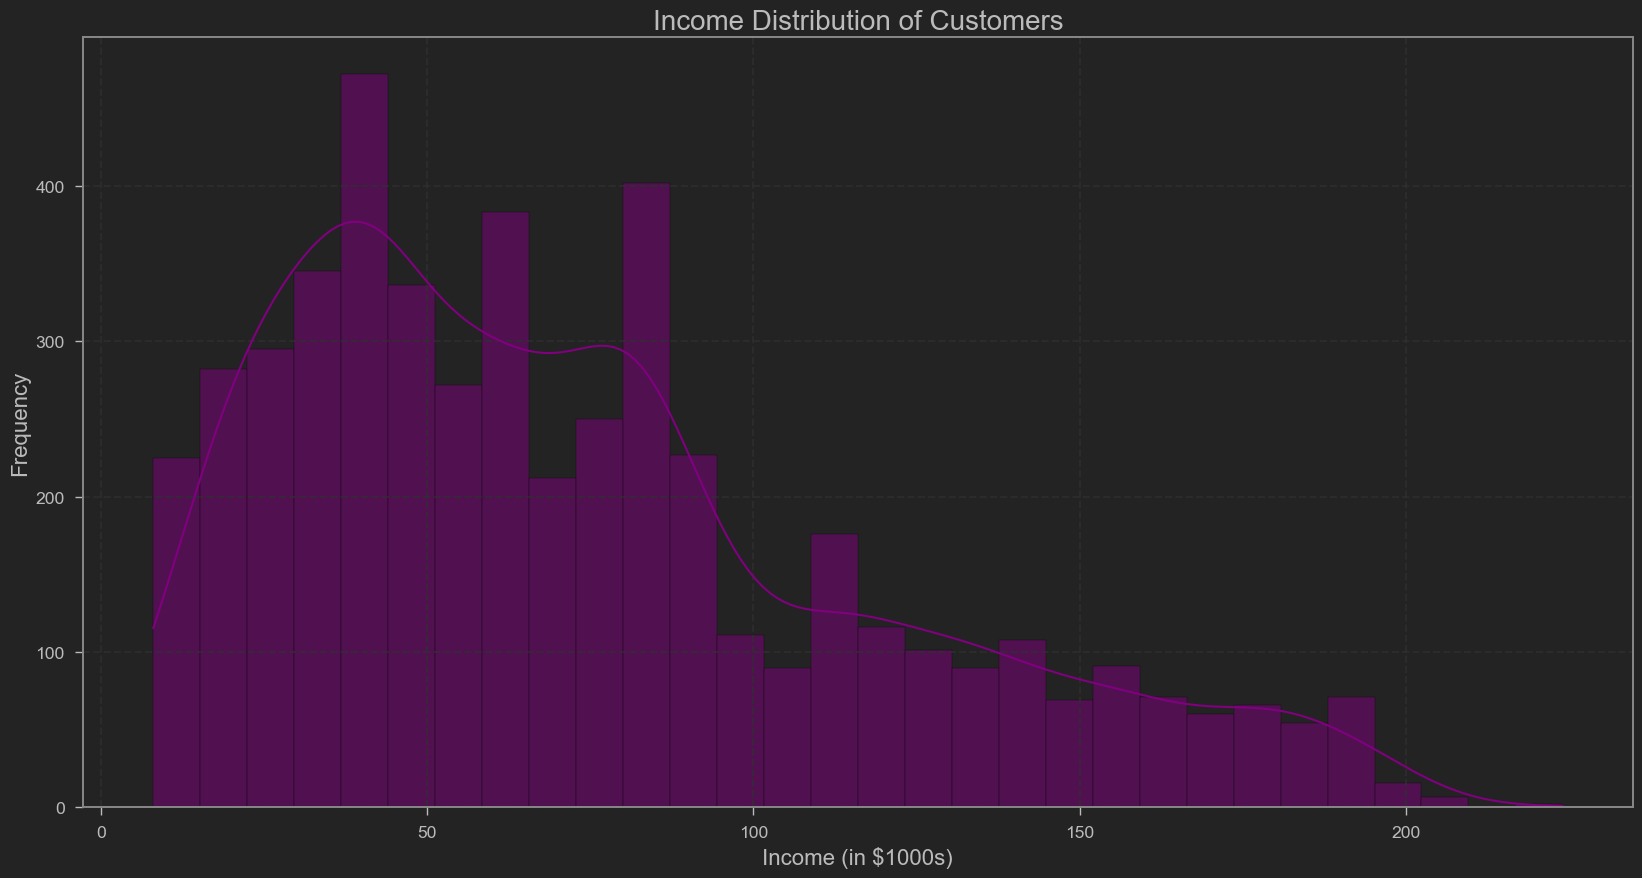

In [127]:
plt.figure(figsize=(20, 10))

# Plot histogram with KDE for 'Income' column
sns.histplot(bank_df['Income'], bins=30, kde=True, color='purple', edgecolor='black')

# Set the title and labels
plt.title('Income Distribution of Customers', fontsize=20)
plt.xlabel('Income (in $1000s)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [128]:
# Create two dataframes for the two classes
personalloans = bank_df[bank_df['Personal Loan'] == 1]
no_personalloans = bank_df[bank_df['Personal Loan'] == 0]

In [129]:
personalloans

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
9       10   34           9     180     93023       1    8.9          3   
16      17   38          14     130     95010       4    4.7          3   
18      19   46          21     193     91604       2    8.1          3   
29      30   38          13     119     94104       1    3.3          2   
38      39   42          18     141     94114       3    5.0          3   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4883  4884   38          13     129     92646       3    4.1          3   
4927  4928   43          19     121     94720       1    0.7          2   
4941  4942   28           4     112     90049       2    1.6          2   
4962  4963   46          20     122     90065       3    3.0          3   
4980  4981   29           5     135     95762       3    5.3          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
9            0              1                   0           0       0   
16         134              1                   0           0       0   
18           0              1                   0           0       0   
29           0              1                   0           1       1   
38           0              1                   1           1       1   
...        ...            ...                 ...         ...     ...   
4883         0              1                   0           1       1   
4927         0              1                   0           1       1   
4941         0              1                   0           0       1   
4962         0              1                   0           1       1   
4980         0              1                   0           1       1   

      CreditCard  
9              0  
16             0  
18             0  
29             1  
38             0  
...          ...  
4883           1  
4927           1  
4941           0  
4962           1  
4980           1  

[480 rows x 14 columns]

In [130]:
personalloans.describe()
# Mean income of customers who have personal loans is generally high ~ 144K and average CC of 3.9K

ID         Age  Experience      Income      ZIP Code  \
count   480.000000  480.000000  480.000000  480.000000    480.000000   
mean   2390.650000   45.066667   19.843750  144.745833  93153.202083   
std    1394.393674   11.590964   11.582443   31.584429   1759.223753   
min      10.000000   26.000000    0.000000   60.000000  90016.000000   
25%    1166.500000   35.000000    9.000000  122.000000  91908.750000   
50%    2342.000000   45.000000   20.000000  142.500000  93407.000000   
75%    3566.000000   55.000000   30.000000  172.000000  94705.500000   
max    4981.000000   65.000000   41.000000  203.000000  96008.000000   

           Family       CCAvg   Education    Mortgage  Personal Loan  \
count  480.000000  480.000000  480.000000  480.000000          480.0   
mean     2.612500    3.905354    2.233333  100.845833            1.0   
std      1.115393    2.097681    0.753373  160.847862            0.0   
min      1.000000    0.000000    1.000000    0.000000            1.0   
25%      2.000000    2.600000    2.000000    0.000000            1.0   
50%      3.000000    3.800000    2.000000    0.000000            1.0   
75%      4.000000    5.347500    3.000000  192.500000            1.0   
max      4.000000   10.000000    3.000000  617.000000            1.0   

       Securities Account  CD Account     Online  CreditCard  
count          480.000000  480.000000  480.00000  480.000000  
mean             0.125000    0.291667    0.60625    0.297917  
std              0.331064    0.455004    0.48909    0.457820  
min              0.000000    0.000000    0.00000    0.000000  
25%              0.000000    0.000000    0.00000    0.000000  
50%              0.000000    0.000000    1.00000    0.000000  
75%              0.000000    1.000000    1.00000    1.000000  
max              1.000000    1.000000    1.00000    1.000000

In [131]:
no_personalloans

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[4520 rows x 14 columns]

In [132]:
no_personalloans.describe()
# Mean income of customers who have do not have personal loans is generally low ~ 66K and average CC of 1.7K

ID          Age   Experience       Income      ZIP Code  \
count  4520.000000  4520.000000  4520.000000  4520.000000   4520.000000   
mean   2512.165487    45.367257    20.132301    66.237389  93152.428761   
std    1448.299331    11.450427    11.456672    40.578534   2156.949654   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1259.750000    35.000000    10.000000    35.000000  91911.000000   
50%    2518.500000    45.000000    20.000000    59.000000  93437.000000   
75%    3768.250000    55.000000    30.000000    84.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  4520.000000  4520.000000  4520.000000  4520.000000         4520.0   
mean      2.373451     1.729009     1.843584    51.789381            0.0   
std       1.148771     1.567647     0.839975    92.038931            0.0   
min       1.000000     0.000000     1.000000     0.000000            0.0   
25%       1.000000     0.600000     1.000000     0.000000            0.0   
50%       2.000000     1.400000     2.000000     0.000000            0.0   
75%       3.000000     2.300000     3.000000    98.000000            0.0   
max       4.000000     8.800000     3.000000   635.000000            0.0   

       Securities Account   CD Account       Online   CreditCard  
count         4520.000000  4520.000000  4520.000000  4520.000000  
mean             0.102212     0.035841     0.595796     0.293584  
std              0.302961     0.185913     0.490792     0.455454  
min              0.000000     0.000000     0.000000     0.000000  
25%              0.000000     0.000000     0.000000     0.000000  
50%              0.000000     0.000000     1.000000     0.000000  
75%              0.000000     0.000000     1.000000     1.000000  
max              1.000000     1.000000     1.000000     1.000000

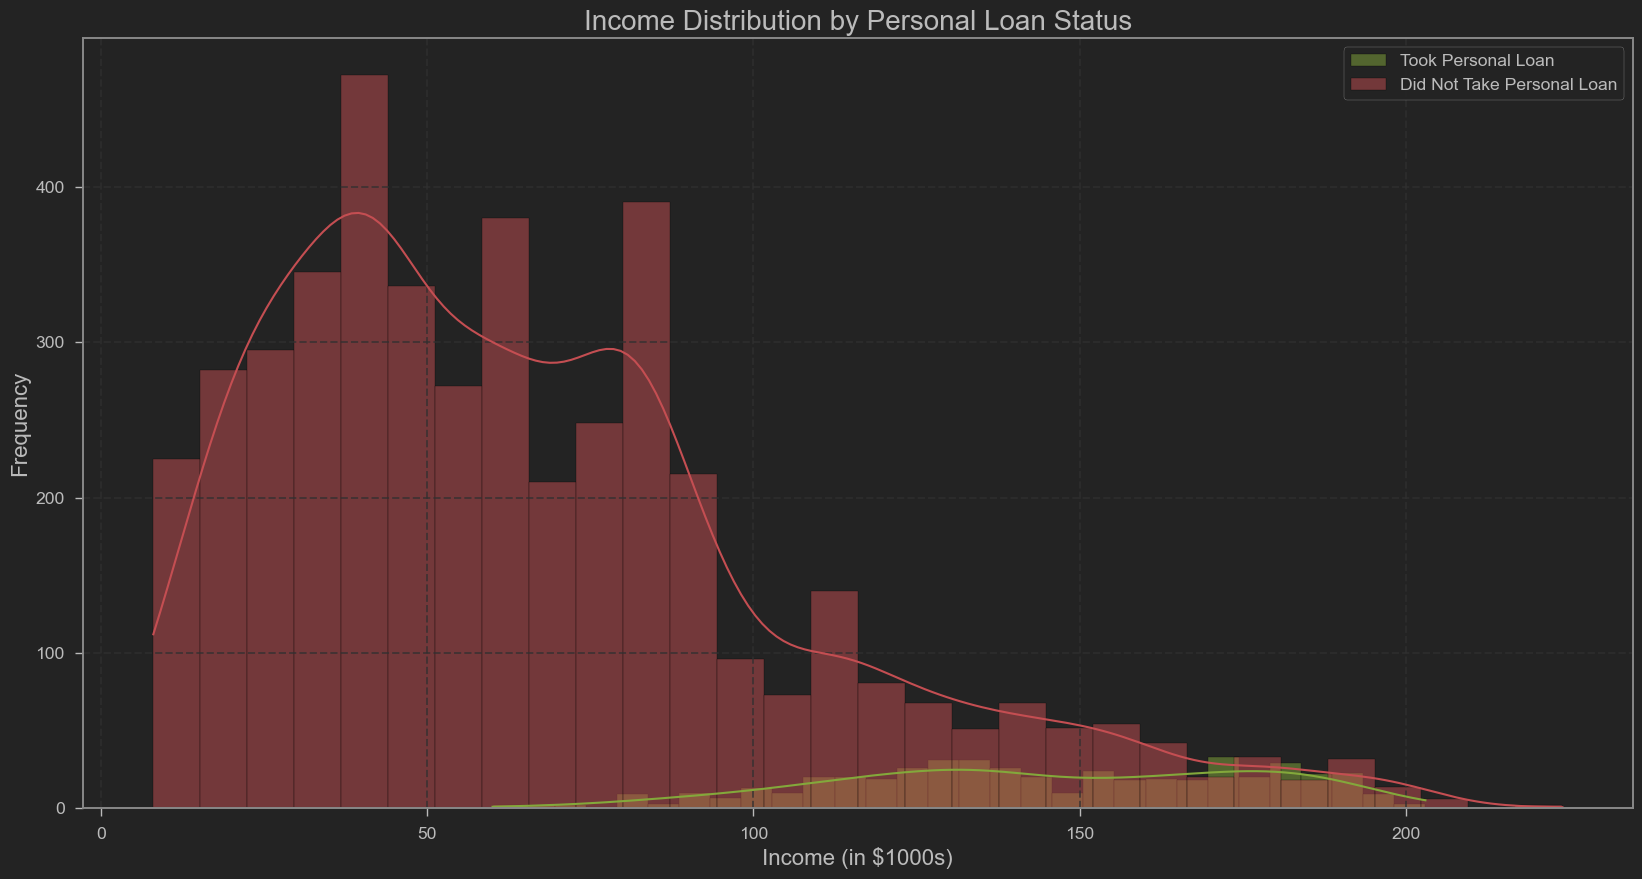

In [133]:
plt.figure(figsize=(20, 10))

# Plot histogram with KDE for customers who took personal loans
sns.histplot(personalloans['Income'], bins=30, kde=True, color='g', label='Took Personal Loan', edgecolor='black')

# Plot histogram with KDE for customers who did not take personal loans
sns.histplot(no_personalloans['Income'], bins=30, kde=True, color='r', label='Did Not Take Personal Loan', edgecolor='black')

# Set the title and labels
plt.title('Income Distribution by Personal Loan Status', fontsize=20)
plt.xlabel('Income (in $1000s)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

# Add legend to differentiate the two distributions
plt.legend()

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<Figure size 3000x3000 with 0 Axes>

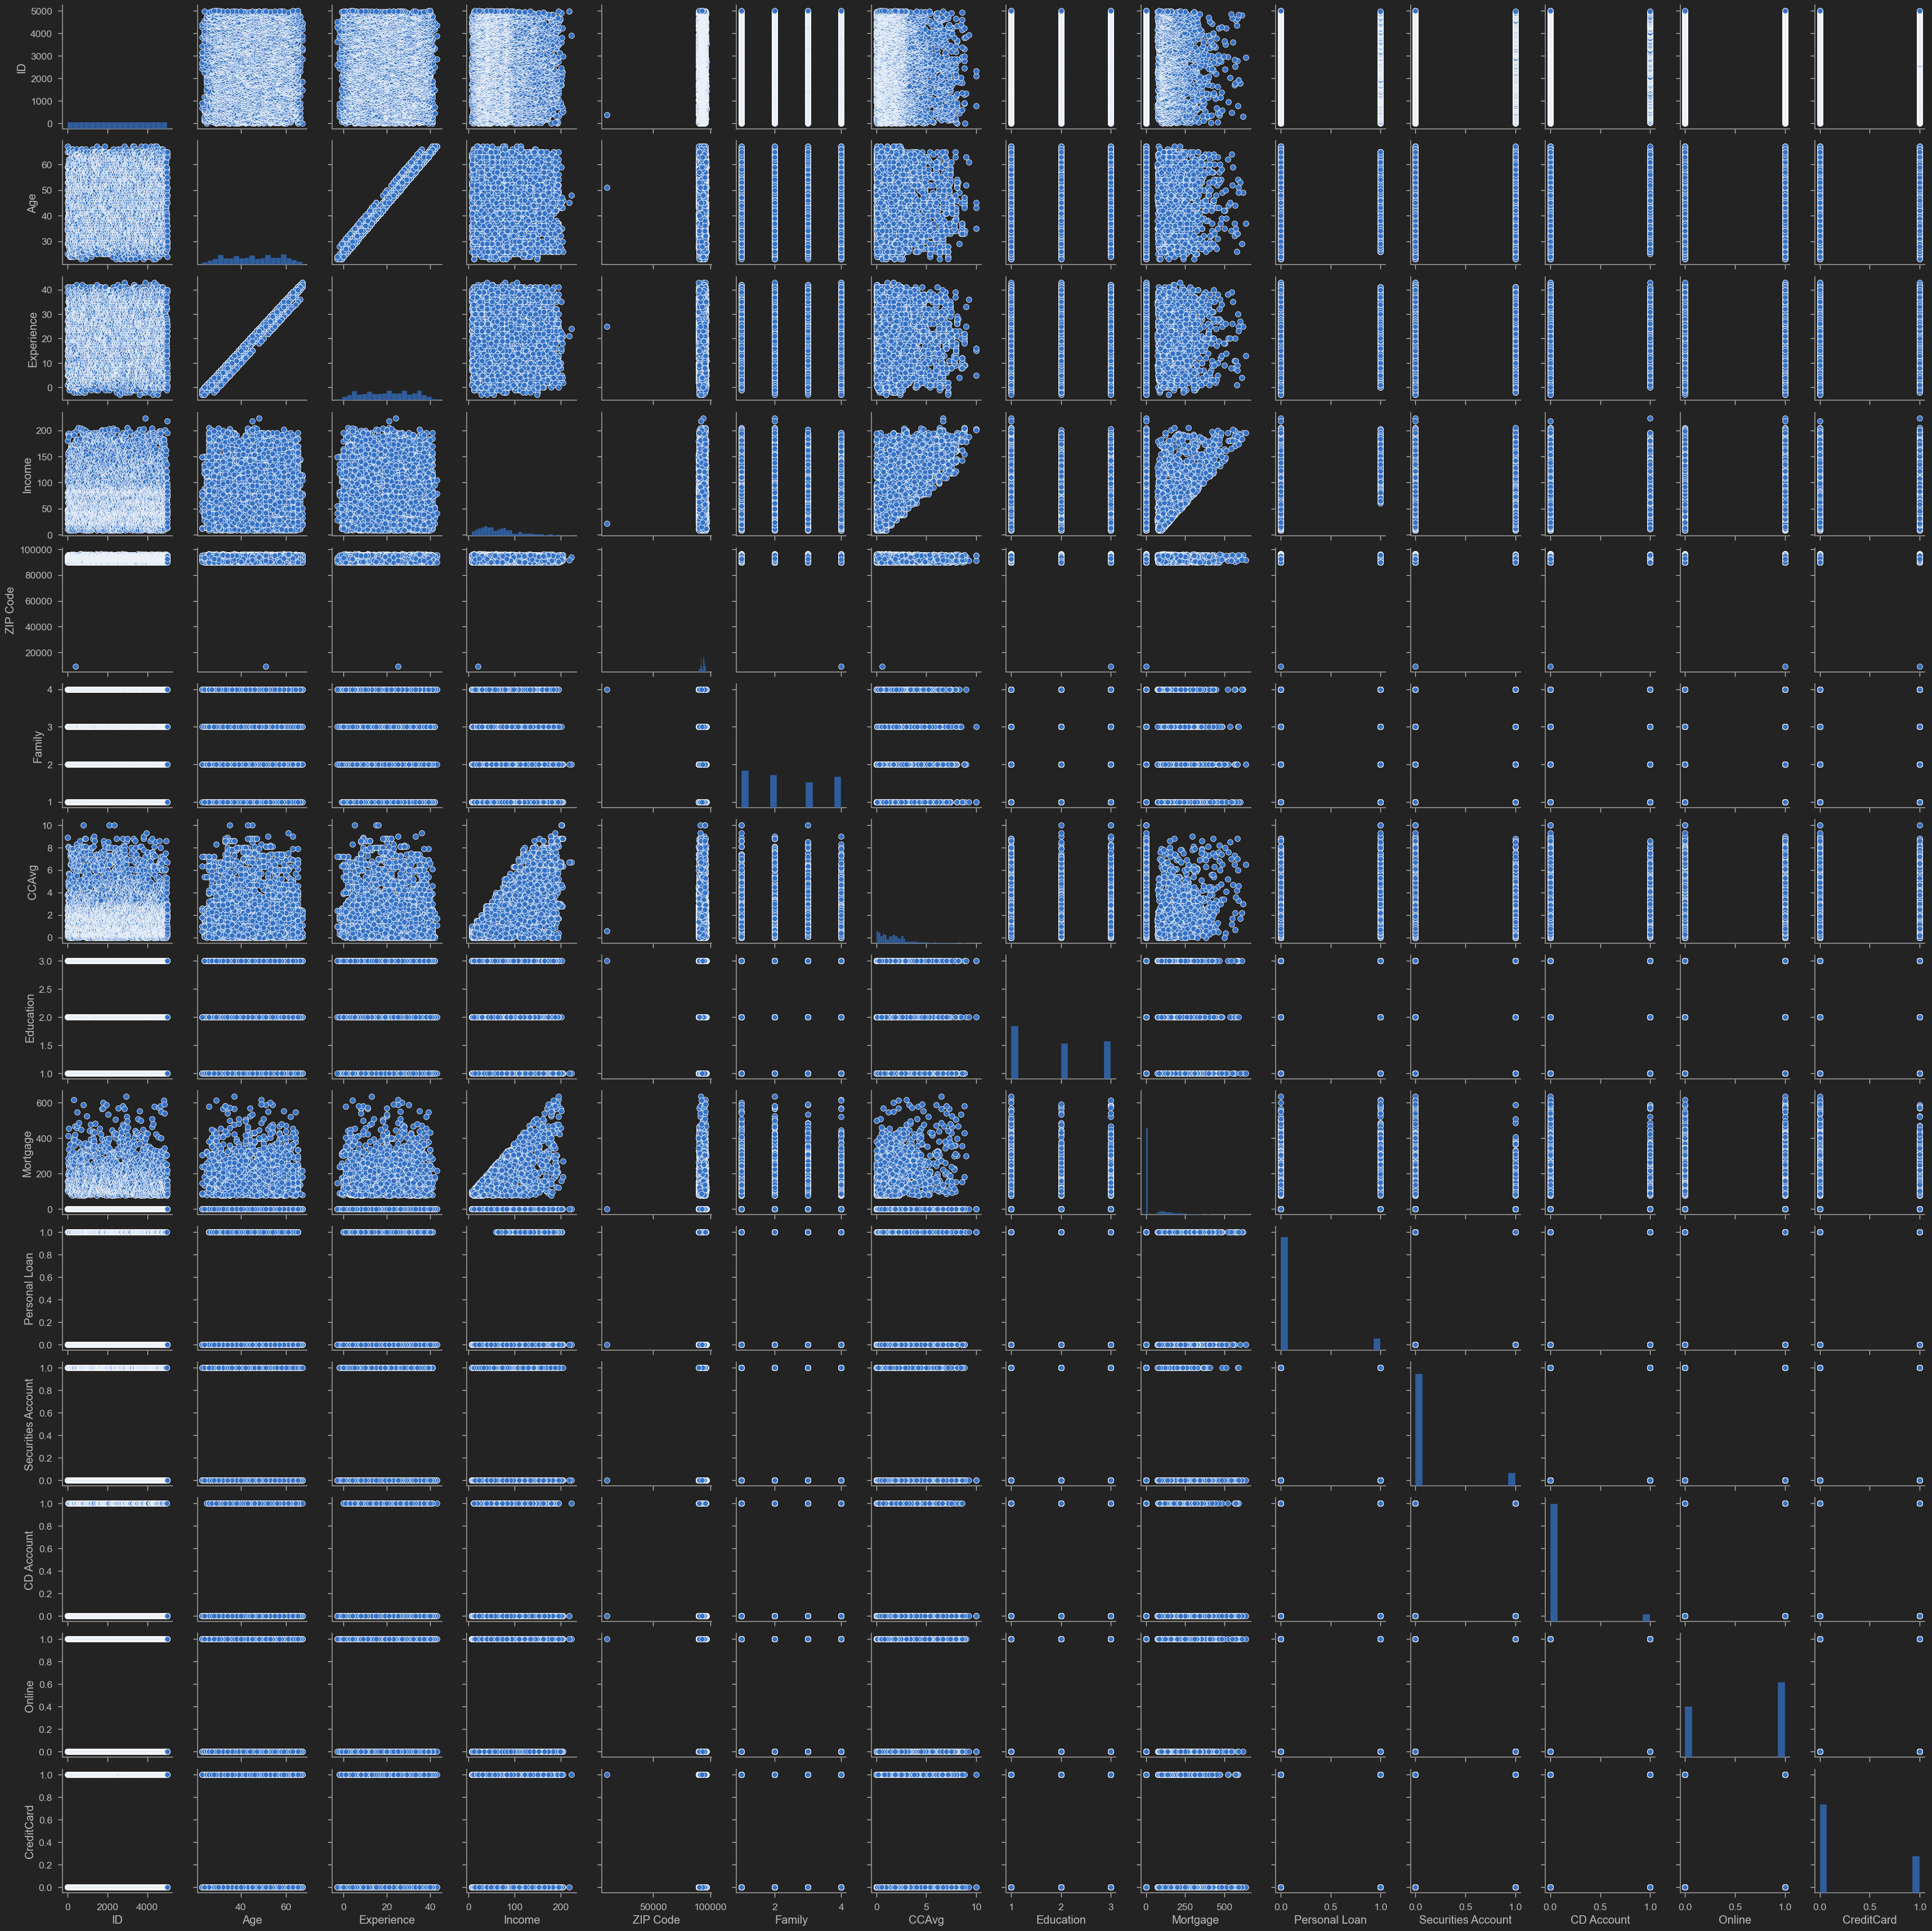

In [134]:
# Plot pairplot
plt.figure(figsize = (30, 30))
sns.pairplot(bank_df)

<Axes: >

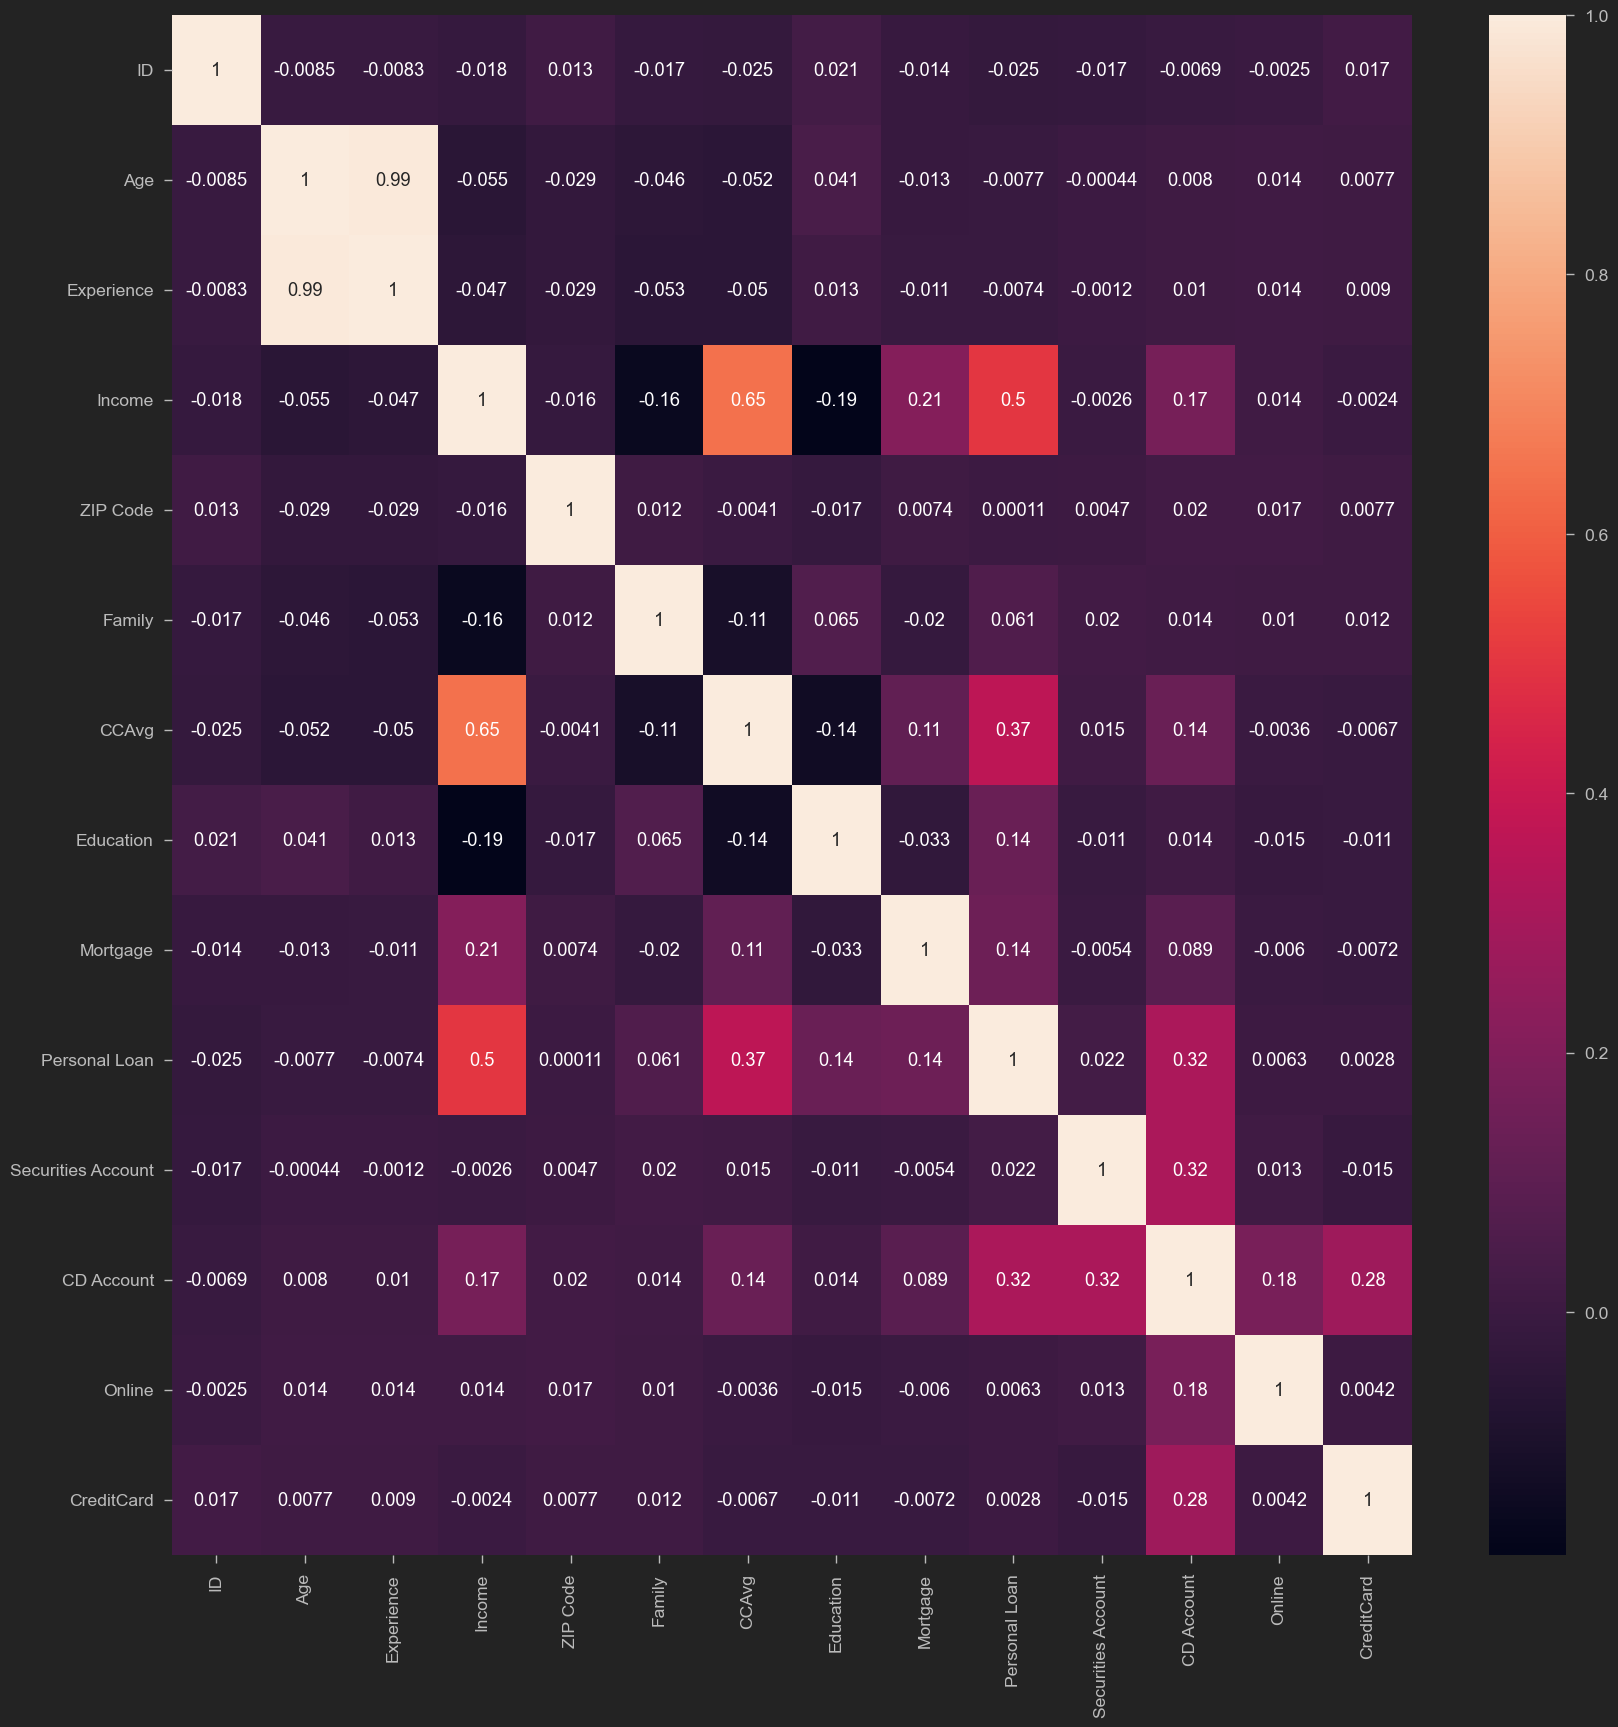

In [135]:
# Correlation plot
# Stong Positive correlation between experience and age
# Strong positive correlation between CC average and income
plt.figure(figsize = (20, 20))
cm = bank_df.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

# PREPARE THE DATA BEFORE TRAINING THE MODEL

In [136]:
# List all column names
bank_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [137]:
# Specify model input features (all data except for the target variable) 
X = bank_df.drop(columns = ['Personal Loan'])
X

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Securities Account  CD Account  Online  CreditCard  
0            0                   1           0       0           0  
1            0                   1           0       0           0  
2            0                   0           0       0           0  
3            0                   0           0       0           0  
4            0                   0           0       0           1  
...        ...                 ...         ...     ...         ...  
4995         0                   0           0       1           0  
4996        85                   0           0       1           0  
4997         0                   0           0       0           0  
4998         0                   0           0       1           0  
4999         0                   0           0       1           1  

[5000 rows x 13 columns]

In [138]:
# Model output (target variable)
y = bank_df['Personal Loan']
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [139]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [140]:
# !pip install scikit-learn

In [141]:
# scale the data before training the model
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)


In [142]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [143]:
# print the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4500, 13), (500, 13), (4500, 2), (500, 2))


- Create a testing dataset that contains 30% of the data instead of 10%. 

In [144]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
# #print the shapes
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

# UNDERSTAND THE THEORY AND INTUITION BEHIND ARTIFICIAL NEURAL NETWORKS AND GRADIENT DESCENT

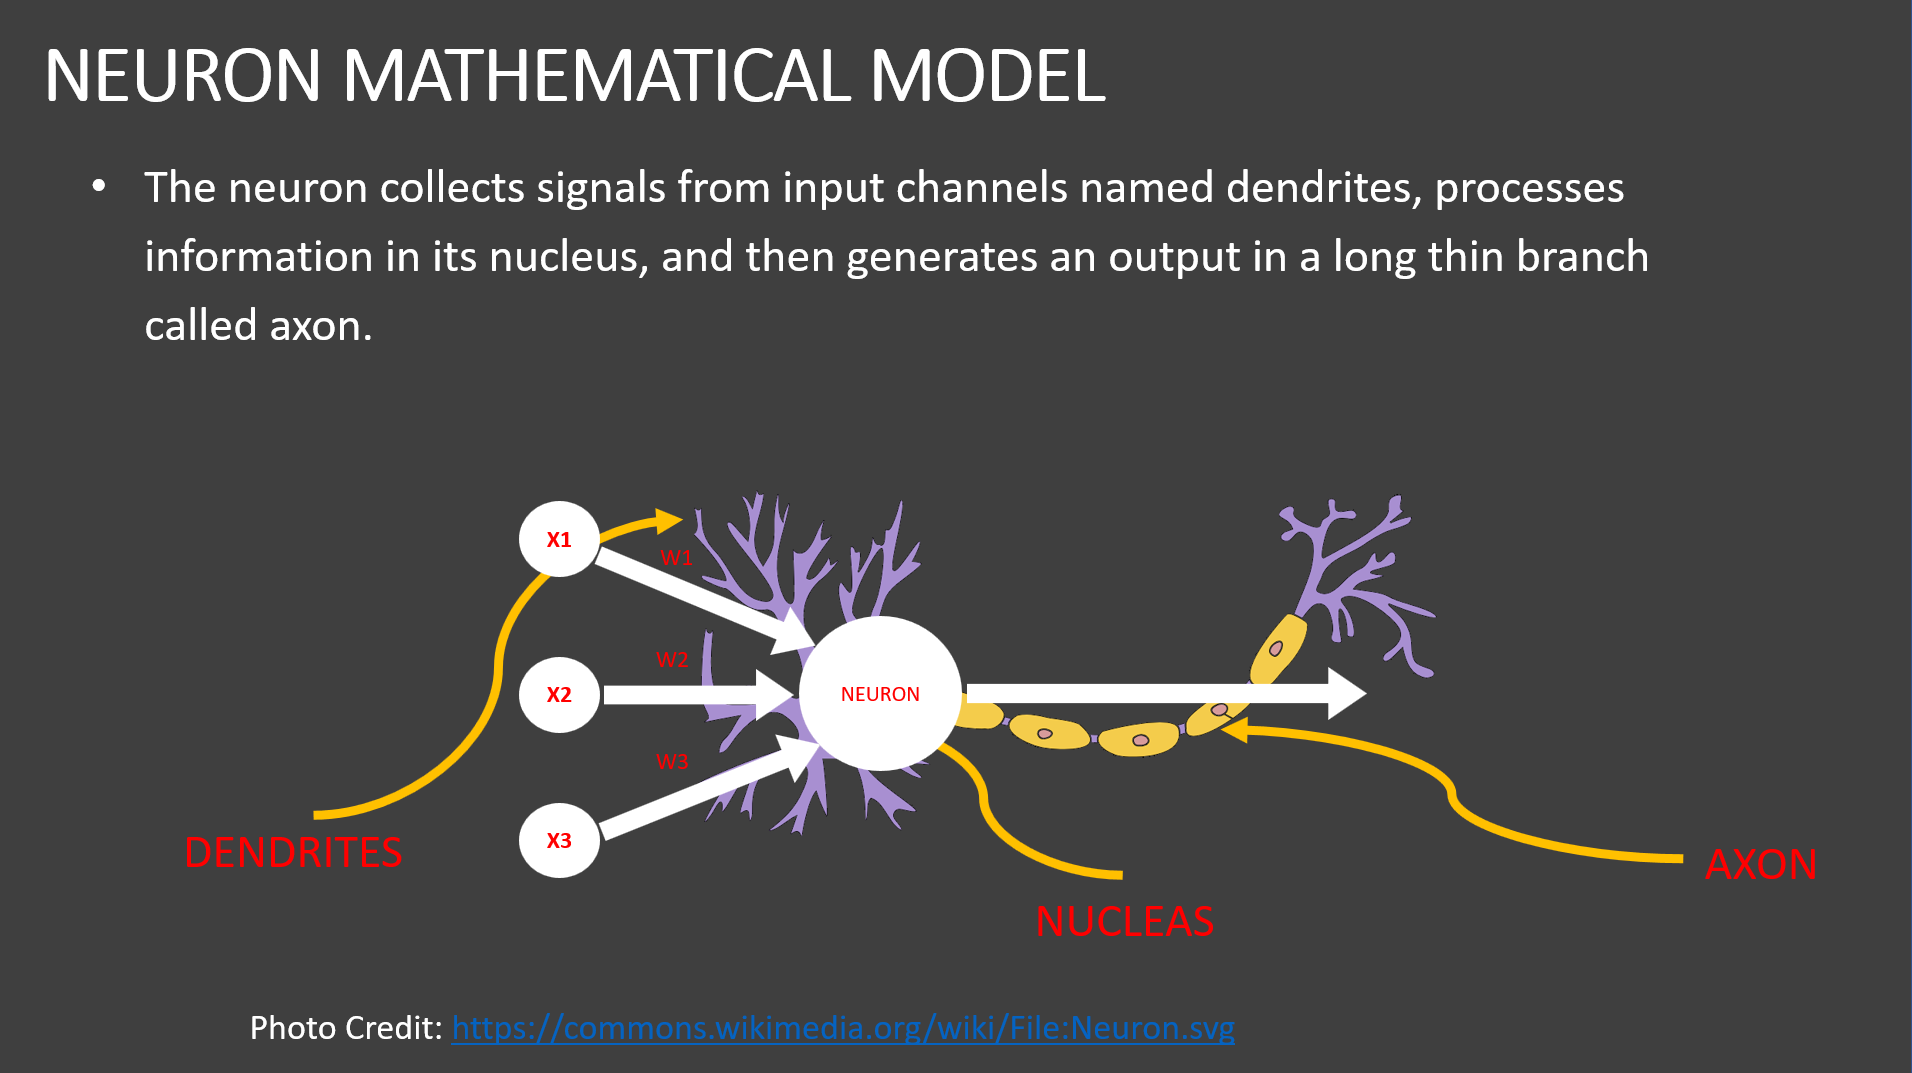

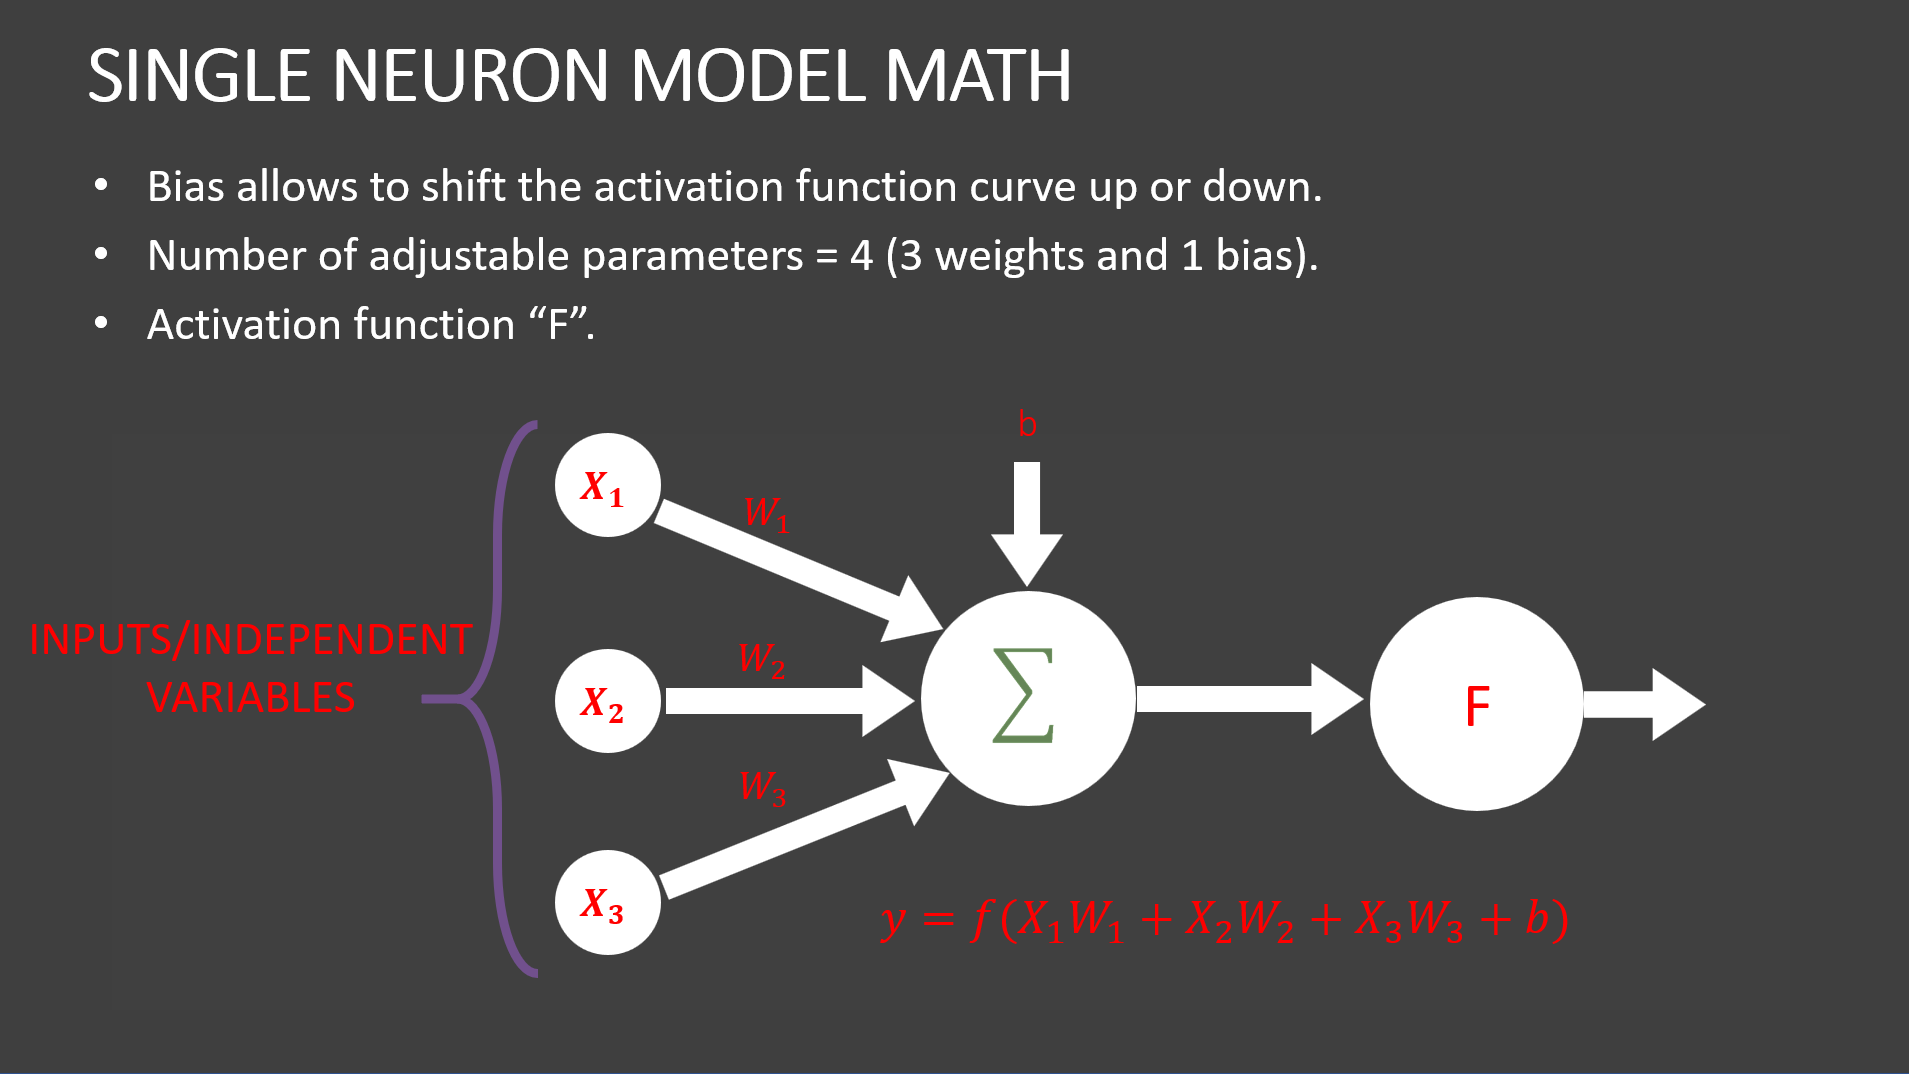

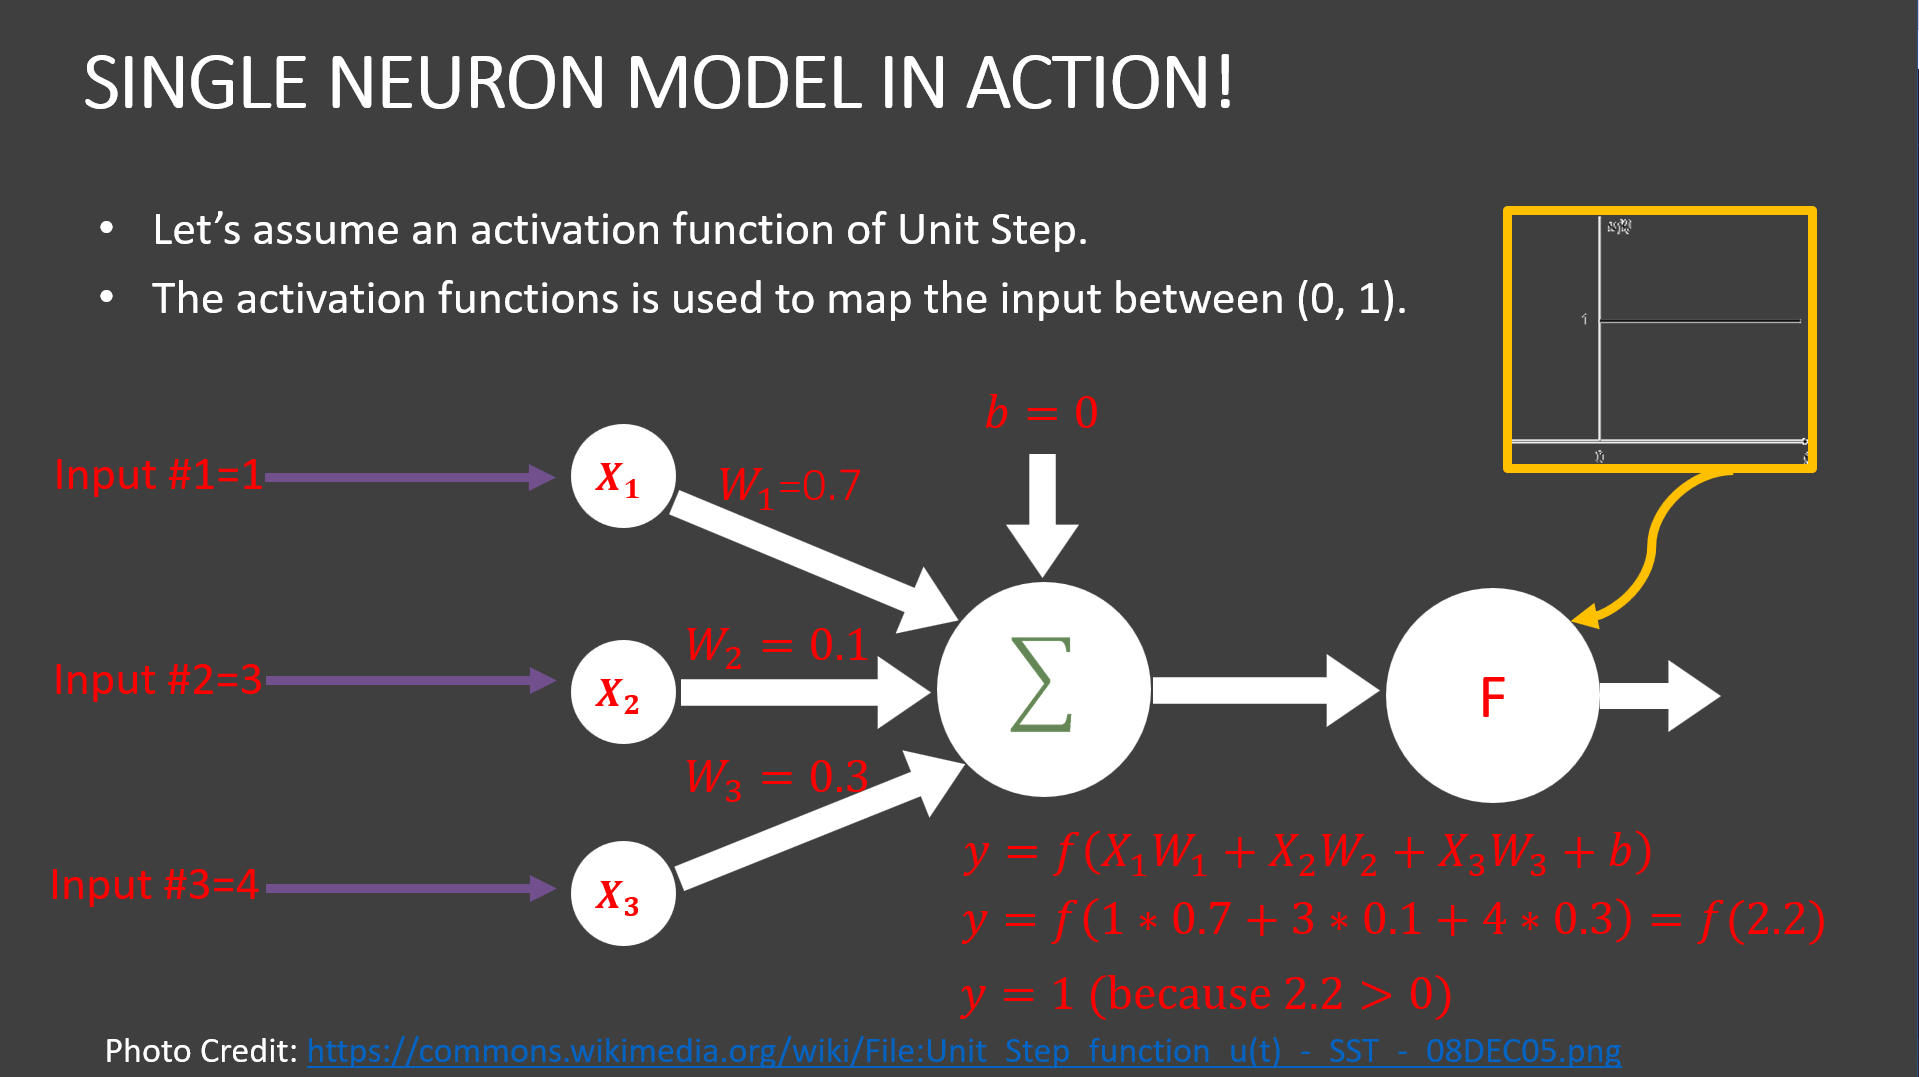

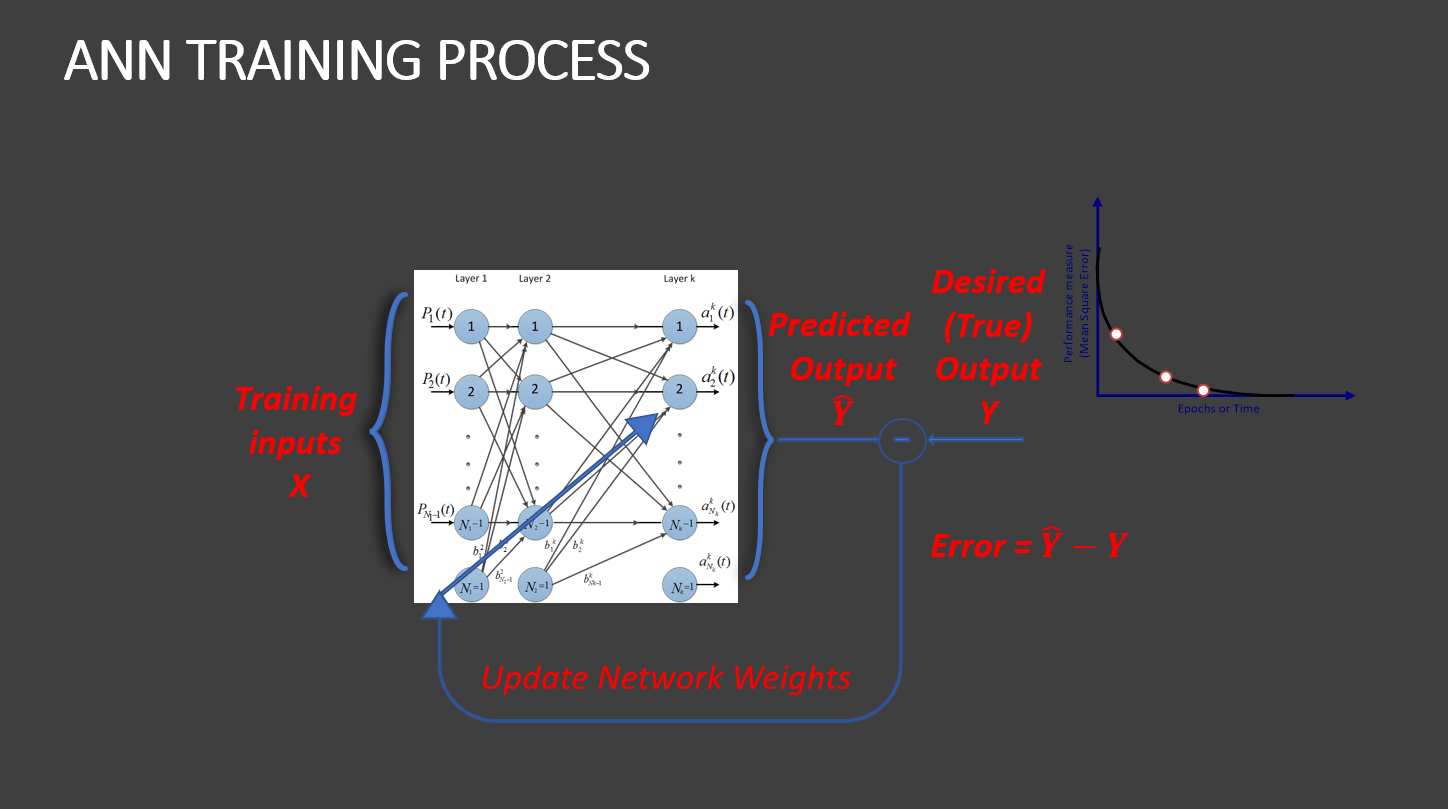

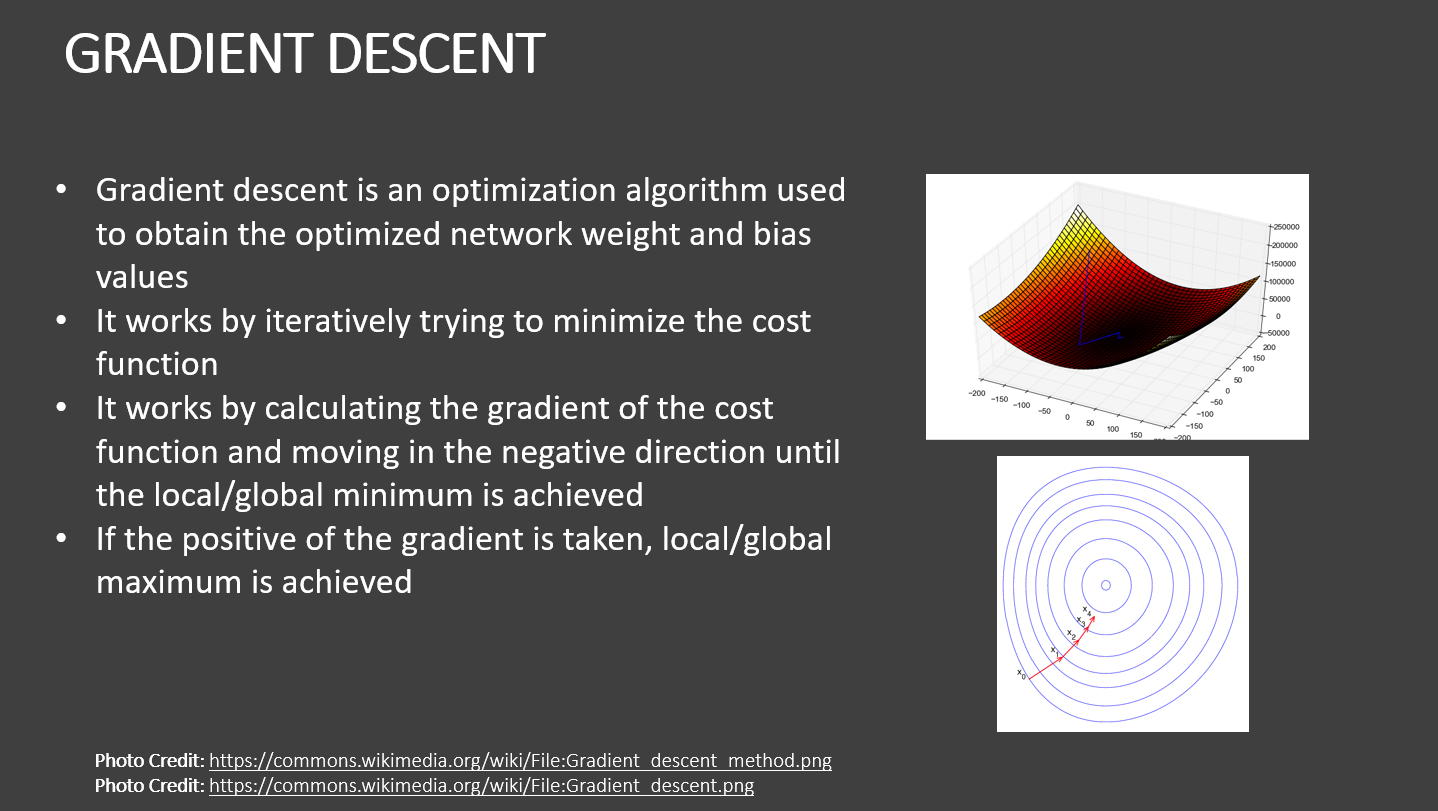

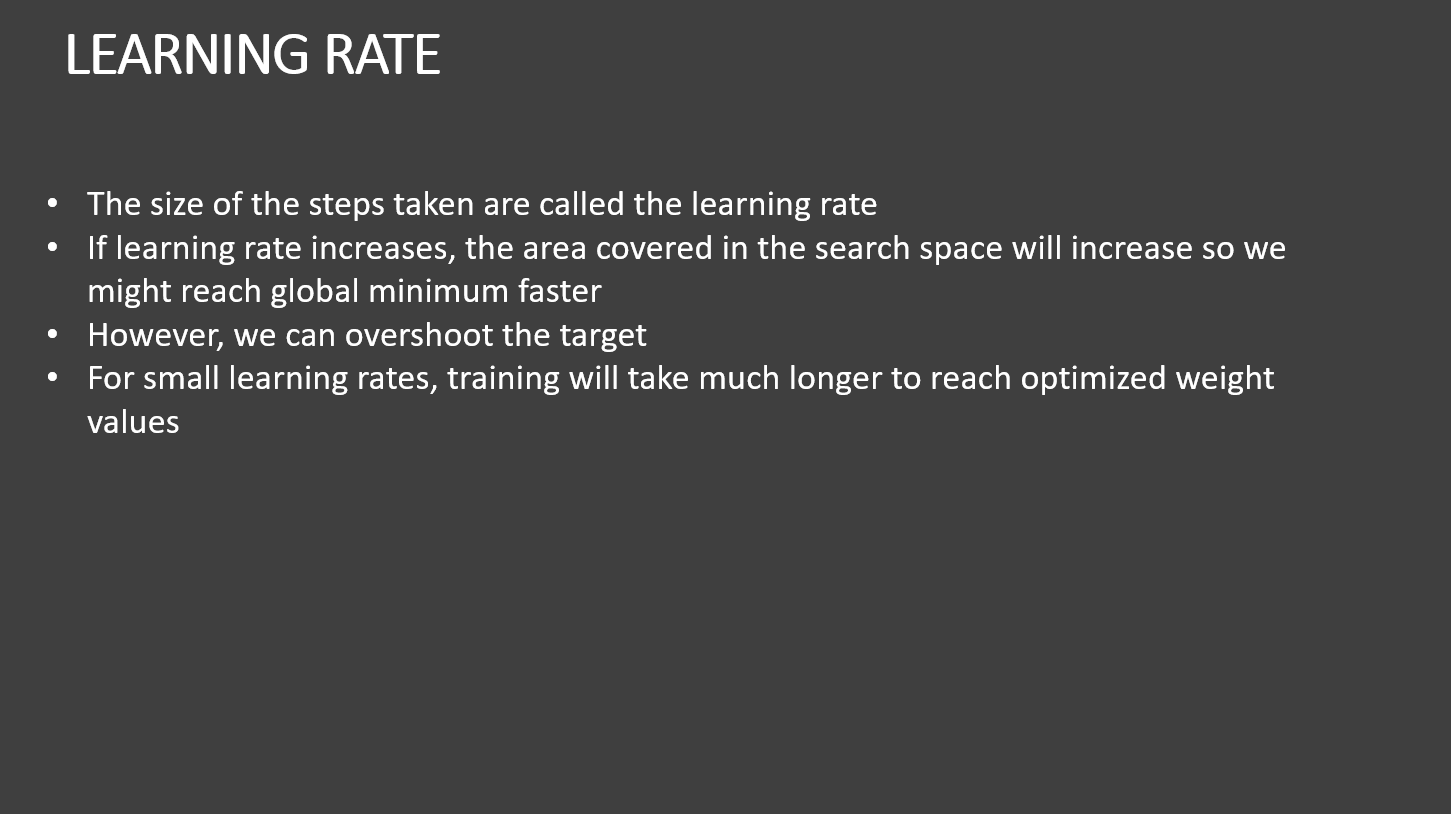

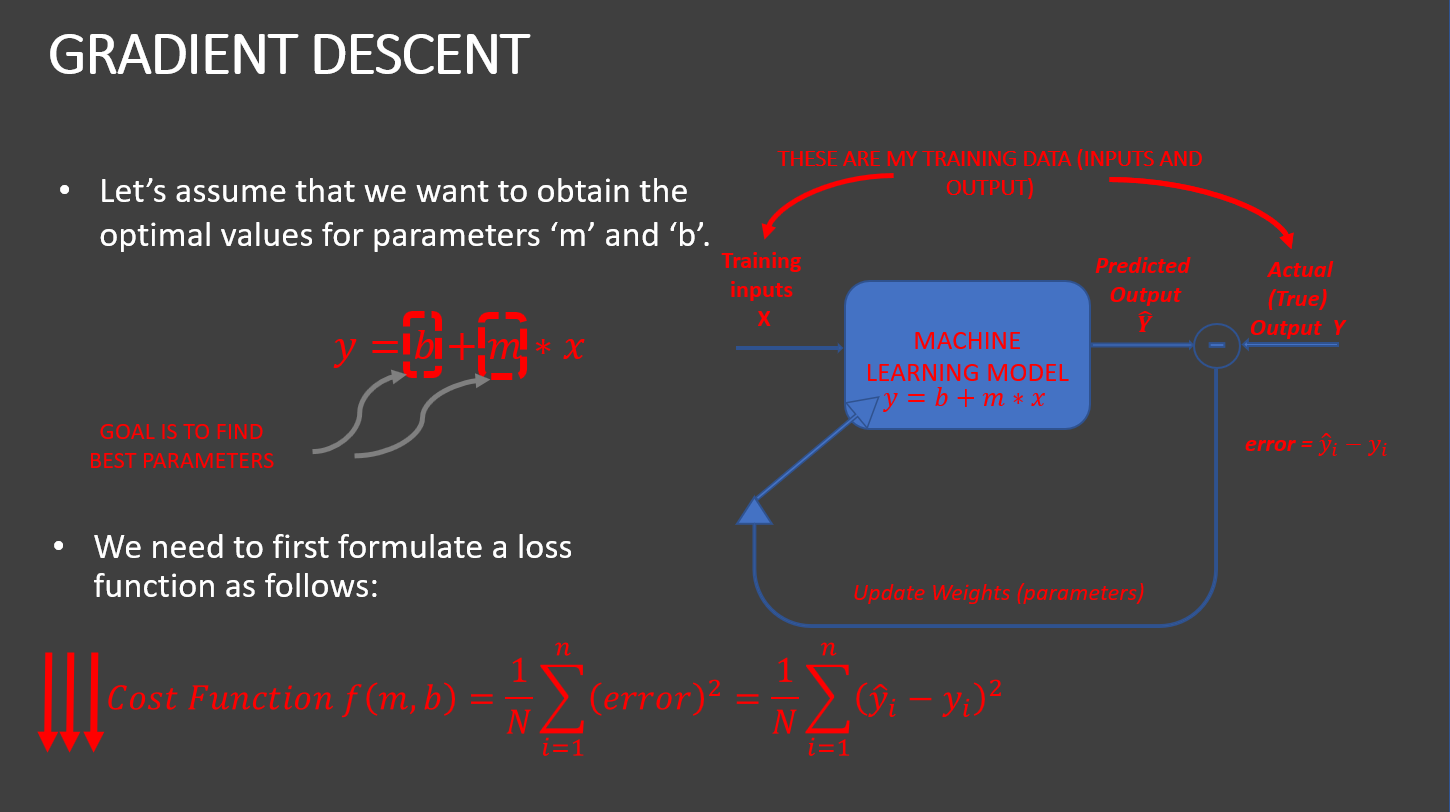

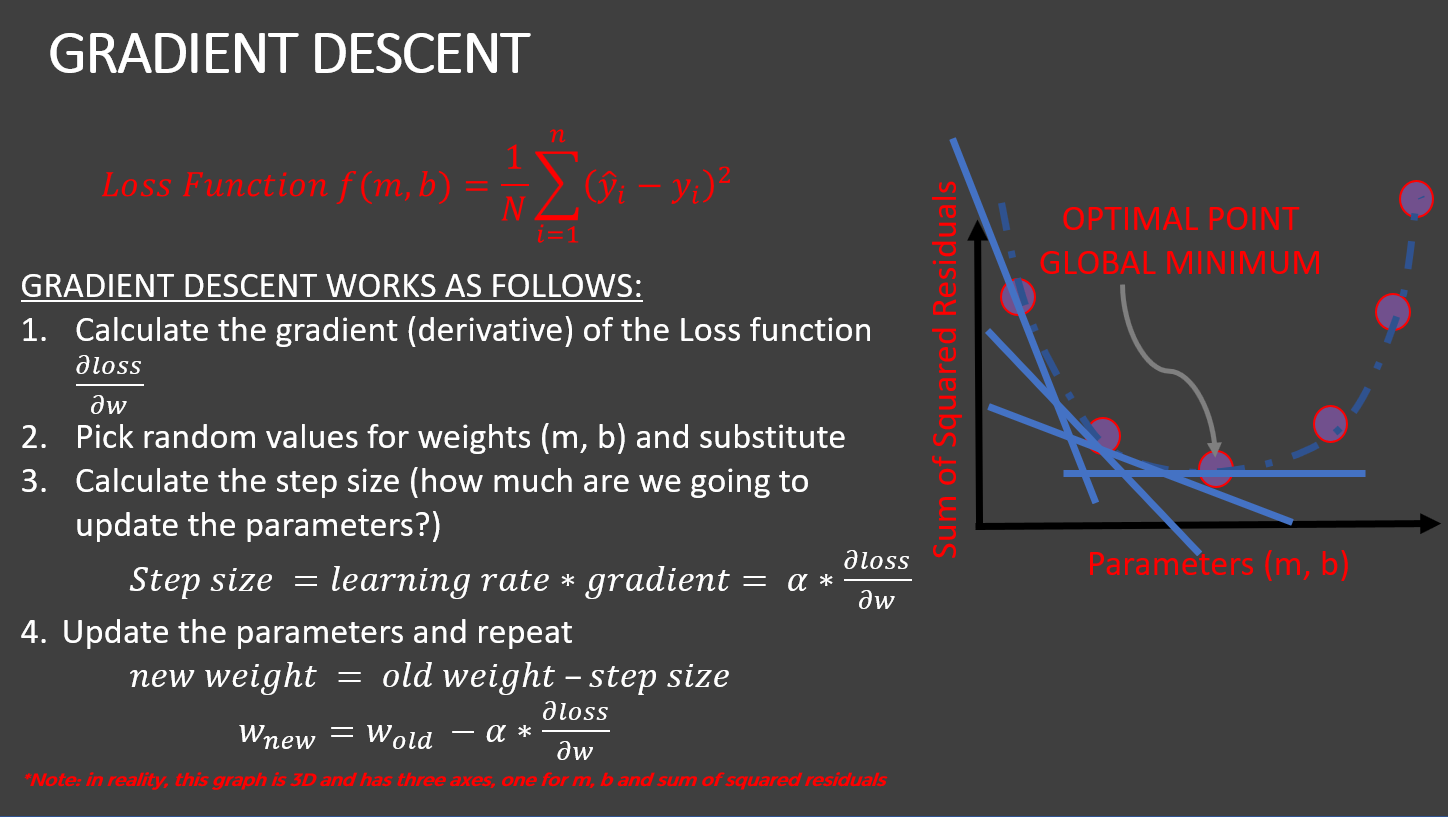

#  BUILD A SIMPLE MULTI LAYER NEURAL NETWORK MODEL

In [145]:
# Create keras sequential model
ANN_model = keras.Sequential()

# Add dense layer
ANN_model.add(Dense(250, input_dim = 13, kernel_initializer = 'normal',activation = 'relu'))

# Add dropout layer
ANN_model.add(Dropout(0.3))

# Add dense layer
ANN_model.add(Dense(500, activation = 'relu'))

# Add dropout layer
ANN_model.add(Dropout(0.3))

# Add dense layer
ANN_model.add(Dense(500, activation = 'relu'))

# Add dropout layer
ANN_model.add(Dropout(0.4))

# Add dense layer
ANN_model.add(Dense(250, activation = 'linear'))

# Add dropout layer
ANN_model.add(Dropout(0.5))

# Add dense layer with softmax activation
ANN_model.add(Dense(2, activation = 'softmax'))
ANN_model.summary()

d:\Resume_Projects\Bank_Loan_Approval_ANN\loanApproval310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 250)            │         3,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 500)            │       125,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 2)              │           502 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 505,252 (1.93 MB)

 Trainable params: 505,252 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

#  COMPILE AND TRAIN DEEP LEARNING MODEL

In [146]:
# Compile the model
ANN_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [147]:
history = ANN_model.fit(X_train, y_train, epochs = 5, validation_split = 0.2, verbose = 1)

Epoch 1/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9064 - loss: 0.2792 - val_accuracy: 0.9233 - val_loss: 0.1652
Epoch 2/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9579 - loss: 0.1168 - val_accuracy: 0.9789 - val_loss: 0.0682
Epoch 3/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9701 - loss: 0.0912 - val_accuracy: 0.9778 - val_loss: 0.0664
Epoch 4/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9706 - loss: 0.0732 - val_accuracy: 0.9789 - val_loss: 0.0651
Epoch 5/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9781 - loss: 0.0626 - val_accuracy: 0.9822 - val_loss: 0.0597


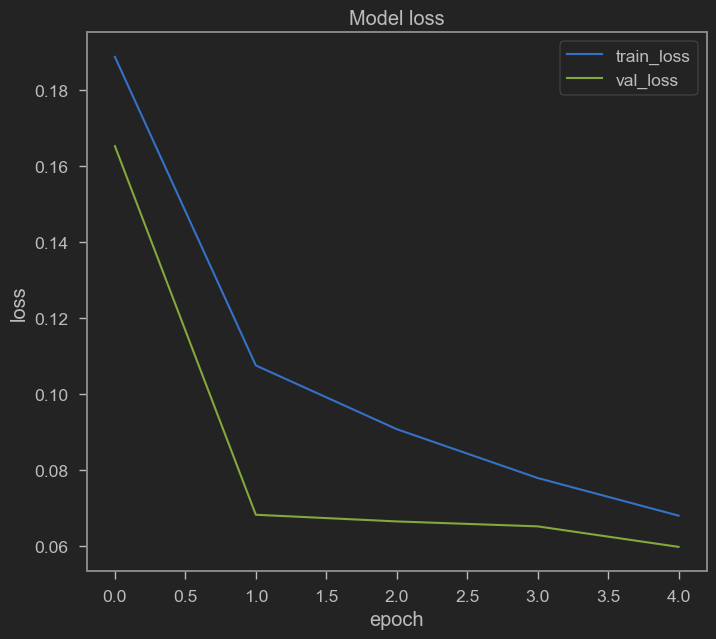

In [148]:
# Plot the model performance across epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

#  ASSESS THE PERFORMANCE OF THE TRAINED MODEL

In [149]:
# Make predictions
predictions = ANN_model.predict(X_test)

# Append the index of max value using argmax function
predict = []
for i in predictions:
    predict.append(np.argmax(i))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [150]:
# Get the acccuracy of the model
result = ANN_model.evaluate(X_test, y_test)

print("Accuracy : {}".format(result[1]))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9872 - loss: 0.0572 
Accuracy : 0.9819999933242798


In [151]:
# Get the original values
y_original = []

for i in y_test:
    y_original.append(np.argmax(i))

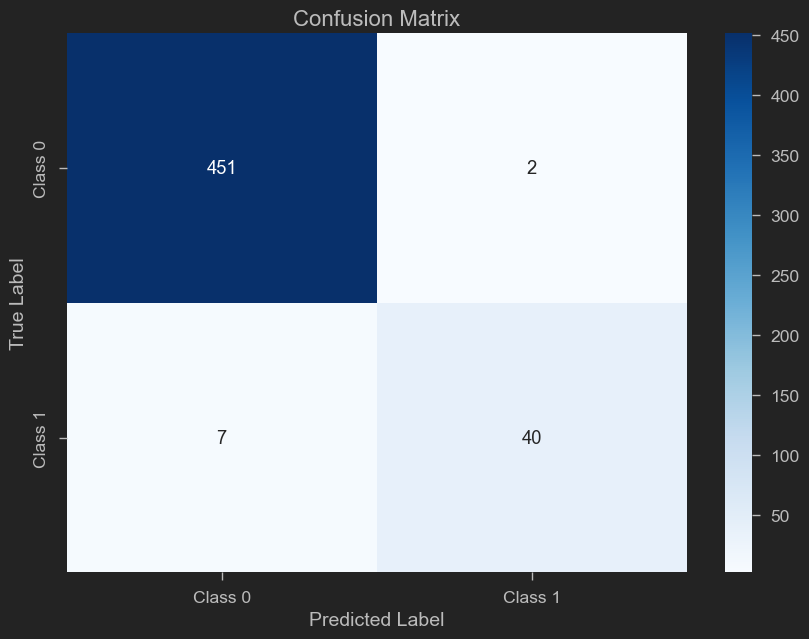

In [154]:
confusion_matrix = metrics.confusion_matrix(y_original, predict)

plt.figure(figsize=(10, 7))

# Plot heatmap for confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

# Set the title and labels
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)

plt.show()

In [158]:
from sklearn.metrics import classification_report

# Assuming you have the true labels y_original and predictions predict
report = classification_report(y_original, predict, target_names=['Class 0', 'Class 1'])
print(report)

              precision    recall  f1-score   support

     Class 0       0.98      1.00      0.99       453
     Class 1       0.95      0.85      0.90        47

    accuracy                           0.98       500
   macro avg       0.97      0.92      0.94       500
weighted avg       0.98      0.98      0.98       500



# Thanking You 

In [ ]:
bj